In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 

# 범주형 수치형 인코딩 및 정규화 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [3]:
from math import sqrt
from matplotlib import pyplot

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

keras = tf.keras

In [4]:
# 한글 표기를 위한 처리
import matplotlib
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [5]:
# 데이터 로드
df = pd.read_csv('../data/train.csv')
df.head()

date   요일  배추_거래량(kg)  배추_가격(원/kg)  무_거래량(kg)  무_가격(원/kg)  \
0  2016-01-01  금요일         0.0          0.0        0.0         0.0   
1  2016-01-02  토요일     80860.0        329.0    80272.0       360.0   
2  2016-01-03  일요일         0.0          0.0        0.0         0.0   
3  2016-01-04  월요일   1422742.5        478.0  1699653.7       382.0   
4  2016-01-05  화요일   1167241.0        442.0  1423482.3       422.0   

   양파_거래량(kg)  양파_가격(원/kg)  건고추_거래량(kg)  건고추_가격(원/kg)  ...  청상추_거래량(kg)  \
0         0.0          0.0          0.0           0.0  ...          0.0   
1    122787.5       1281.0          3.0       11000.0  ...       5125.0   
2         0.0          0.0          0.0           0.0  ...          0.0   
3   2315079.0       1235.0        699.0        4464.0  ...      38525.5   
4   2092960.1       1213.0       1112.6        4342.0  ...      32615.0   

   청상추_가격(원/kg)  백다다기_거래량(kg)  백다다기_가격(원/kg)  애호박_거래량(kg)  애호박_가격(원/kg)  \
0           0.0           0.0            0.0          0.0           0.0   
1        9235.0         434.0         2109.0      19159.0        2414.0   
2           0.0           0.0            0.0          0.0           0.0   
3        7631.0      500702.0         2046.0     620539.0        2018.0   
4        6926.0      147638.0         2268.0     231958.0        2178.0   

   캠벨얼리_거래량(kg)  캠벨얼리_가격(원/kg)  샤인마스캇_거래량(kg)  샤인마스캇_가격(원/kg)  
0           0.0            0.0            0.0             0.0  
1         880.0         2014.0            0.0             0.0  
2           0.0            0.0            0.0             0.0  
3        2703.8         3885.0            0.0             0.0  
4        8810.0         2853.0            0.0             0.0  

[5 rows x 44 columns]

In [6]:
# 불러온 데이터 카피 
cp_df = df.copy()

In [7]:
cp_df.shape

(1733, 44)

# 간단한 EDA 시각화 

In [8]:
# 데이터 결측치 확인
# for col in df.columns:
#     print('column : {0} \t\t 결측치 : {1}'.format(col, df[col].isnull().sum()))

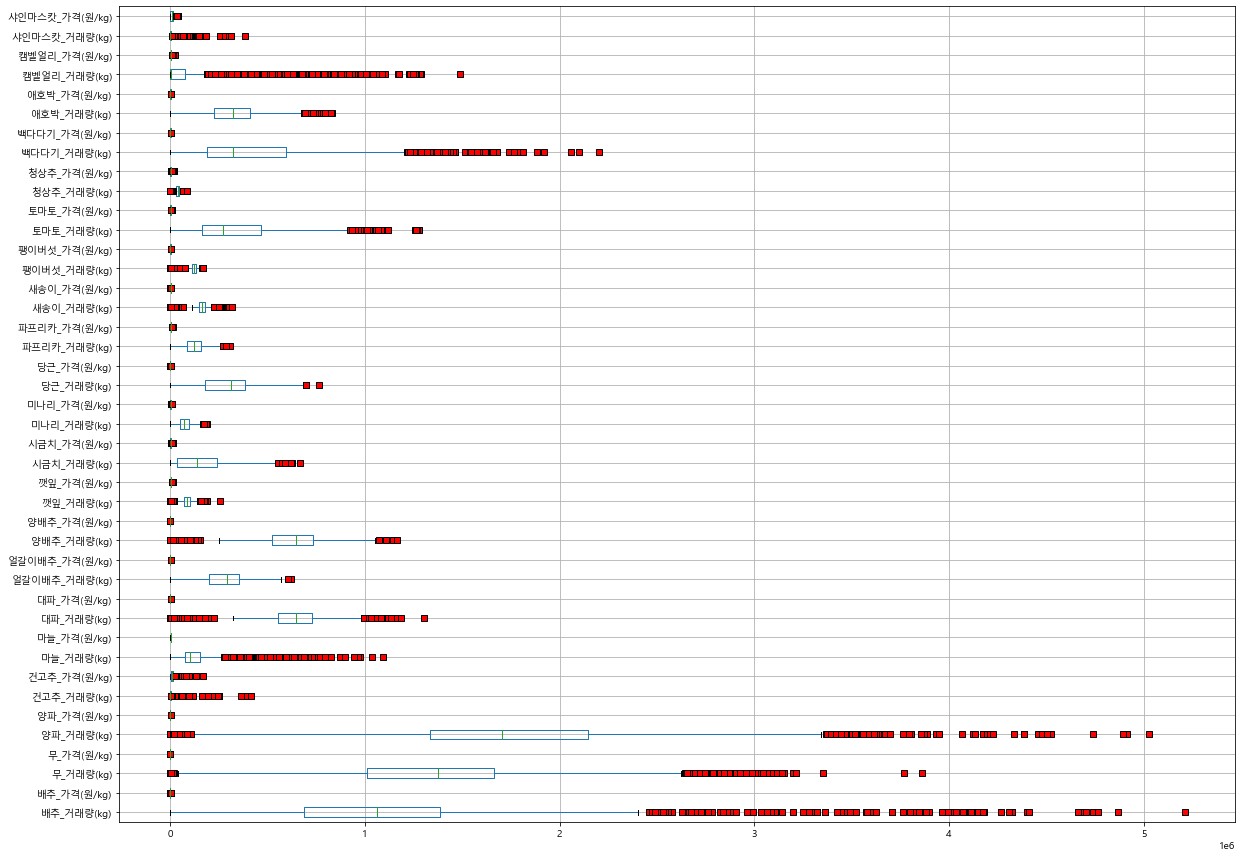

In [9]:
# 이상치 확인
df[df.columns].boxplot(figsize=(20, 15)
                                    , vert=False
                                    , flierprops=dict(markerfacecolor='r', marker='s'))
plt.show()

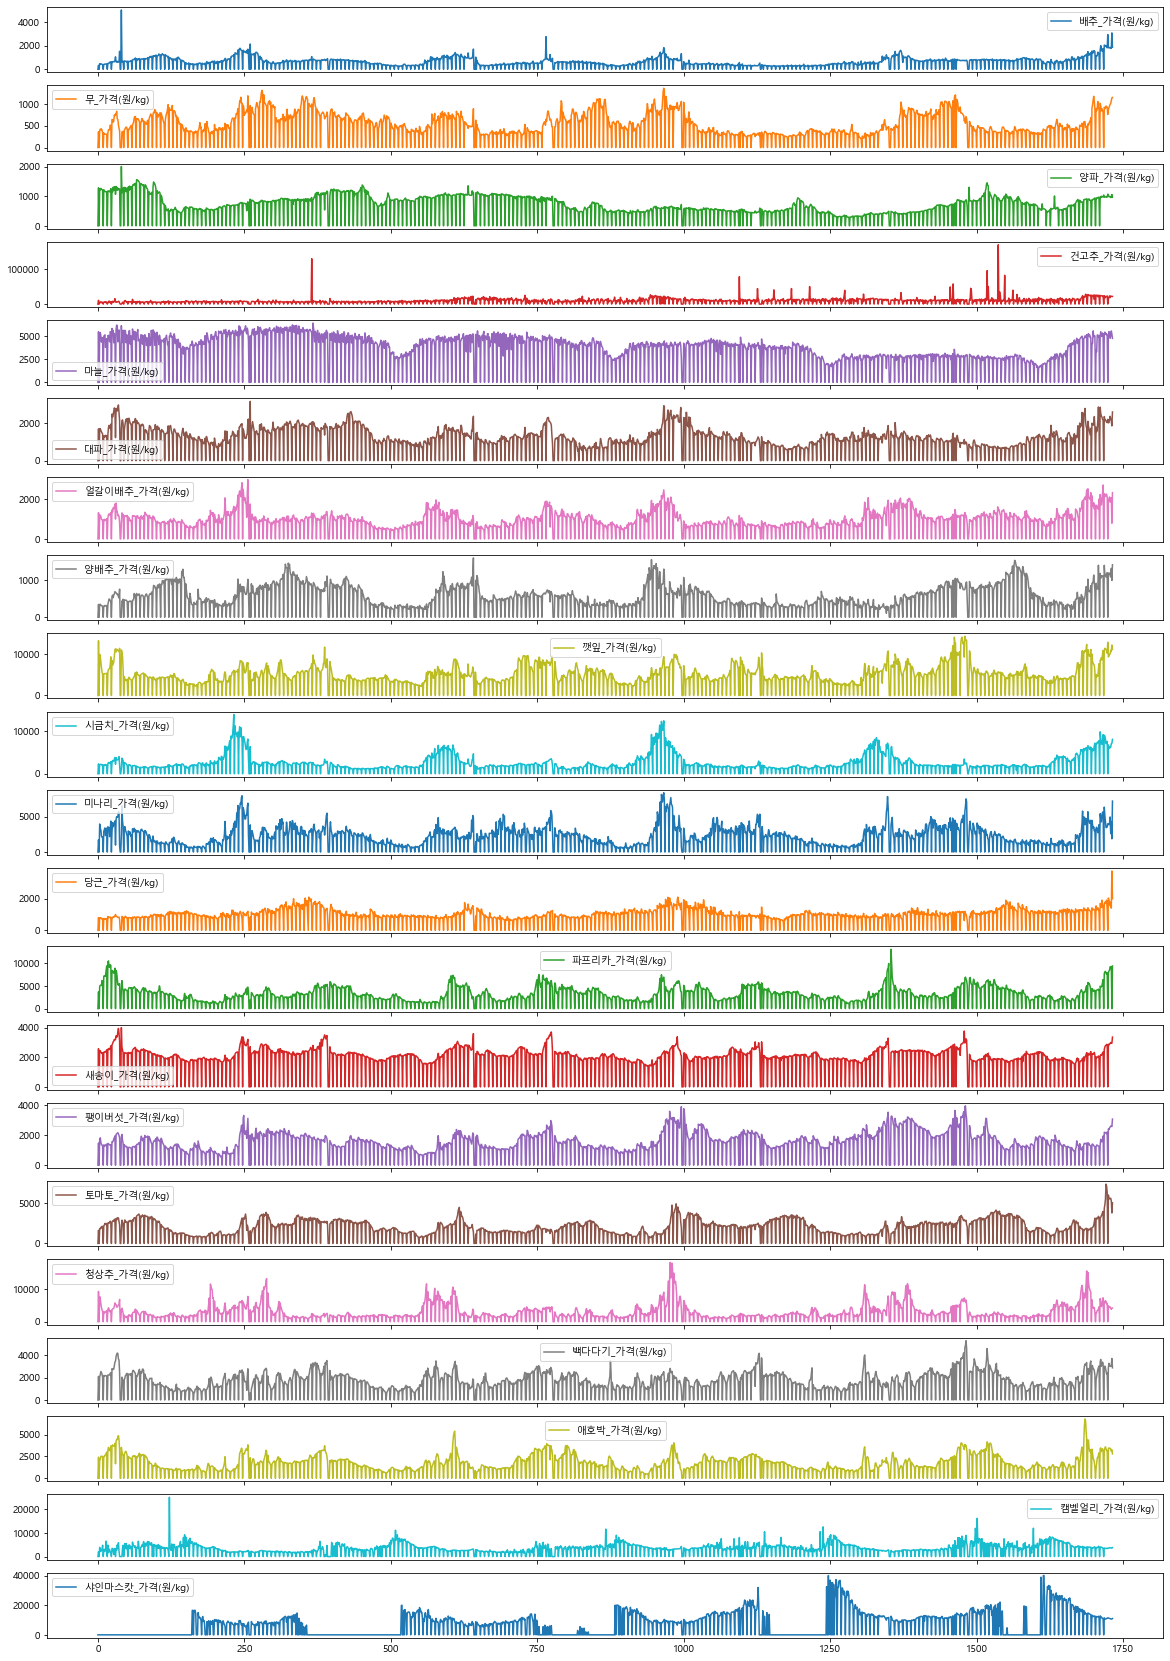

In [10]:
# 품목별 가격
df.iloc[:, 3::2].plot(figsize=(20, 30), subplots=True)
plt.show()

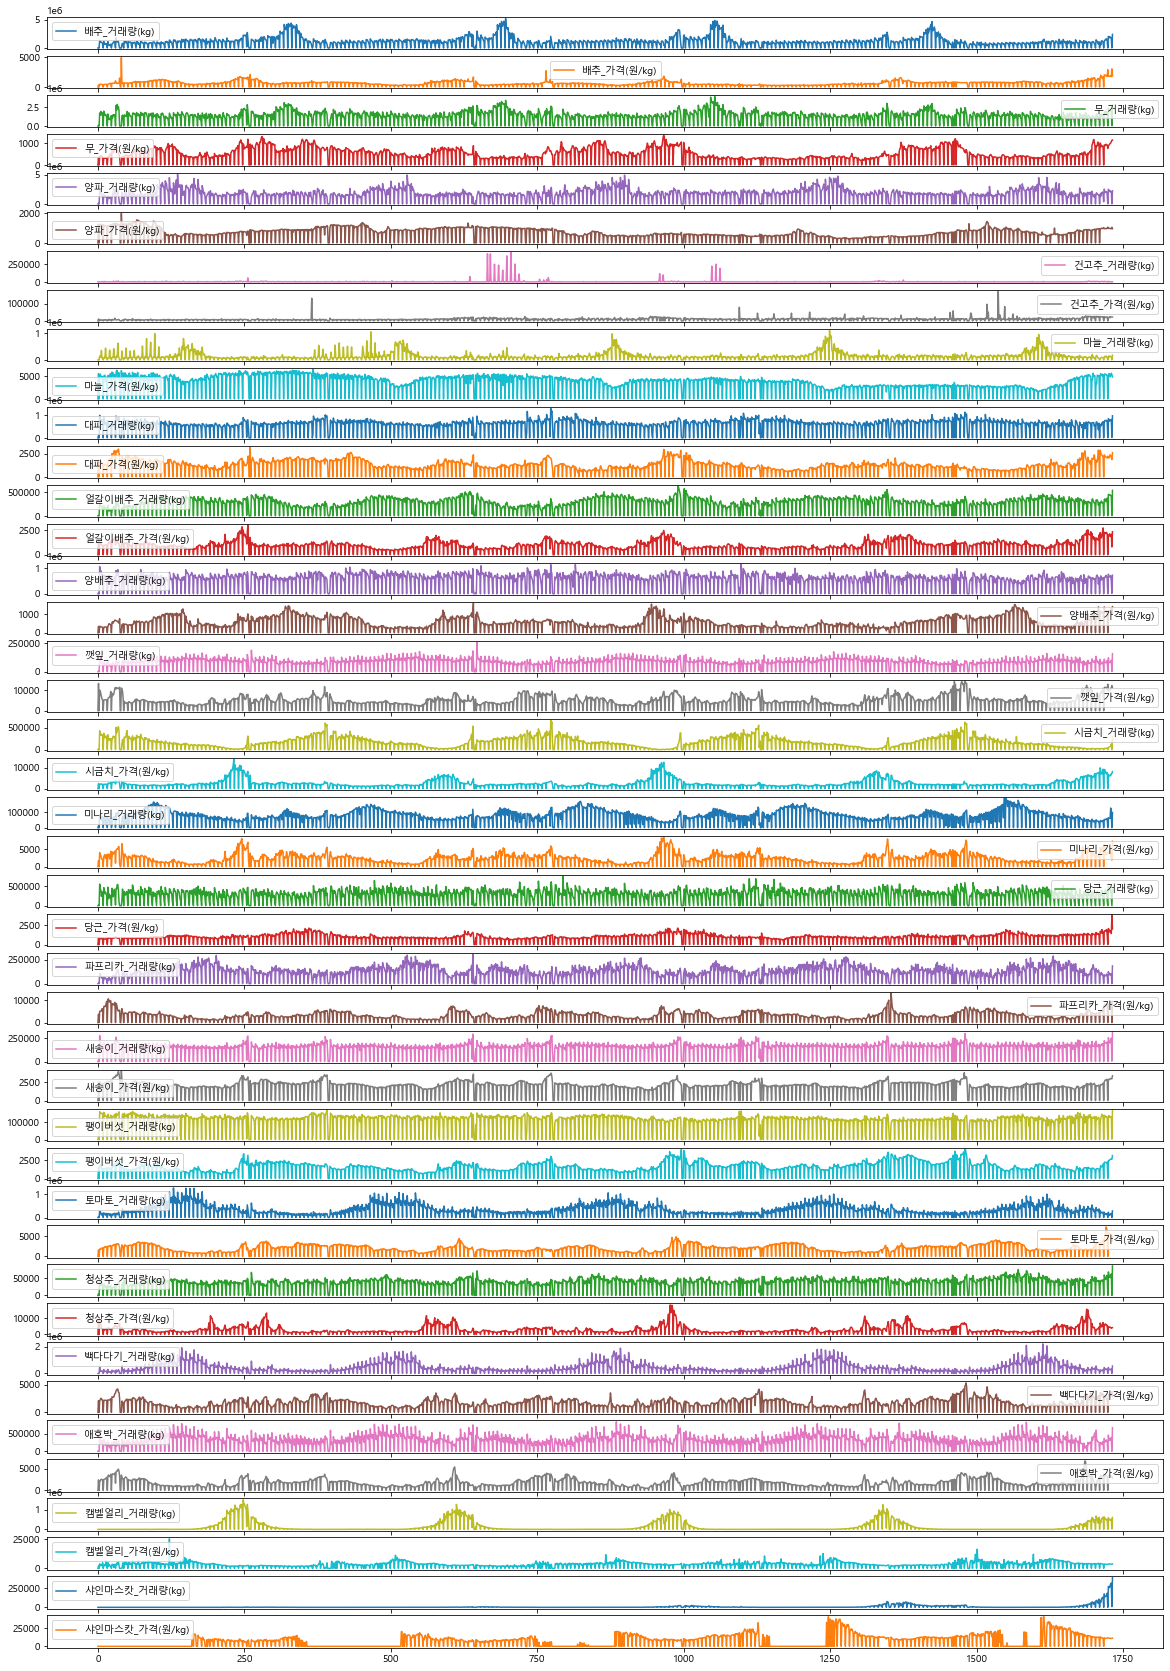

In [11]:
# # 품목별 거래량
df.iloc[:, 2::1].plot(figsize=(20, 30), subplots=True)
plt.show()

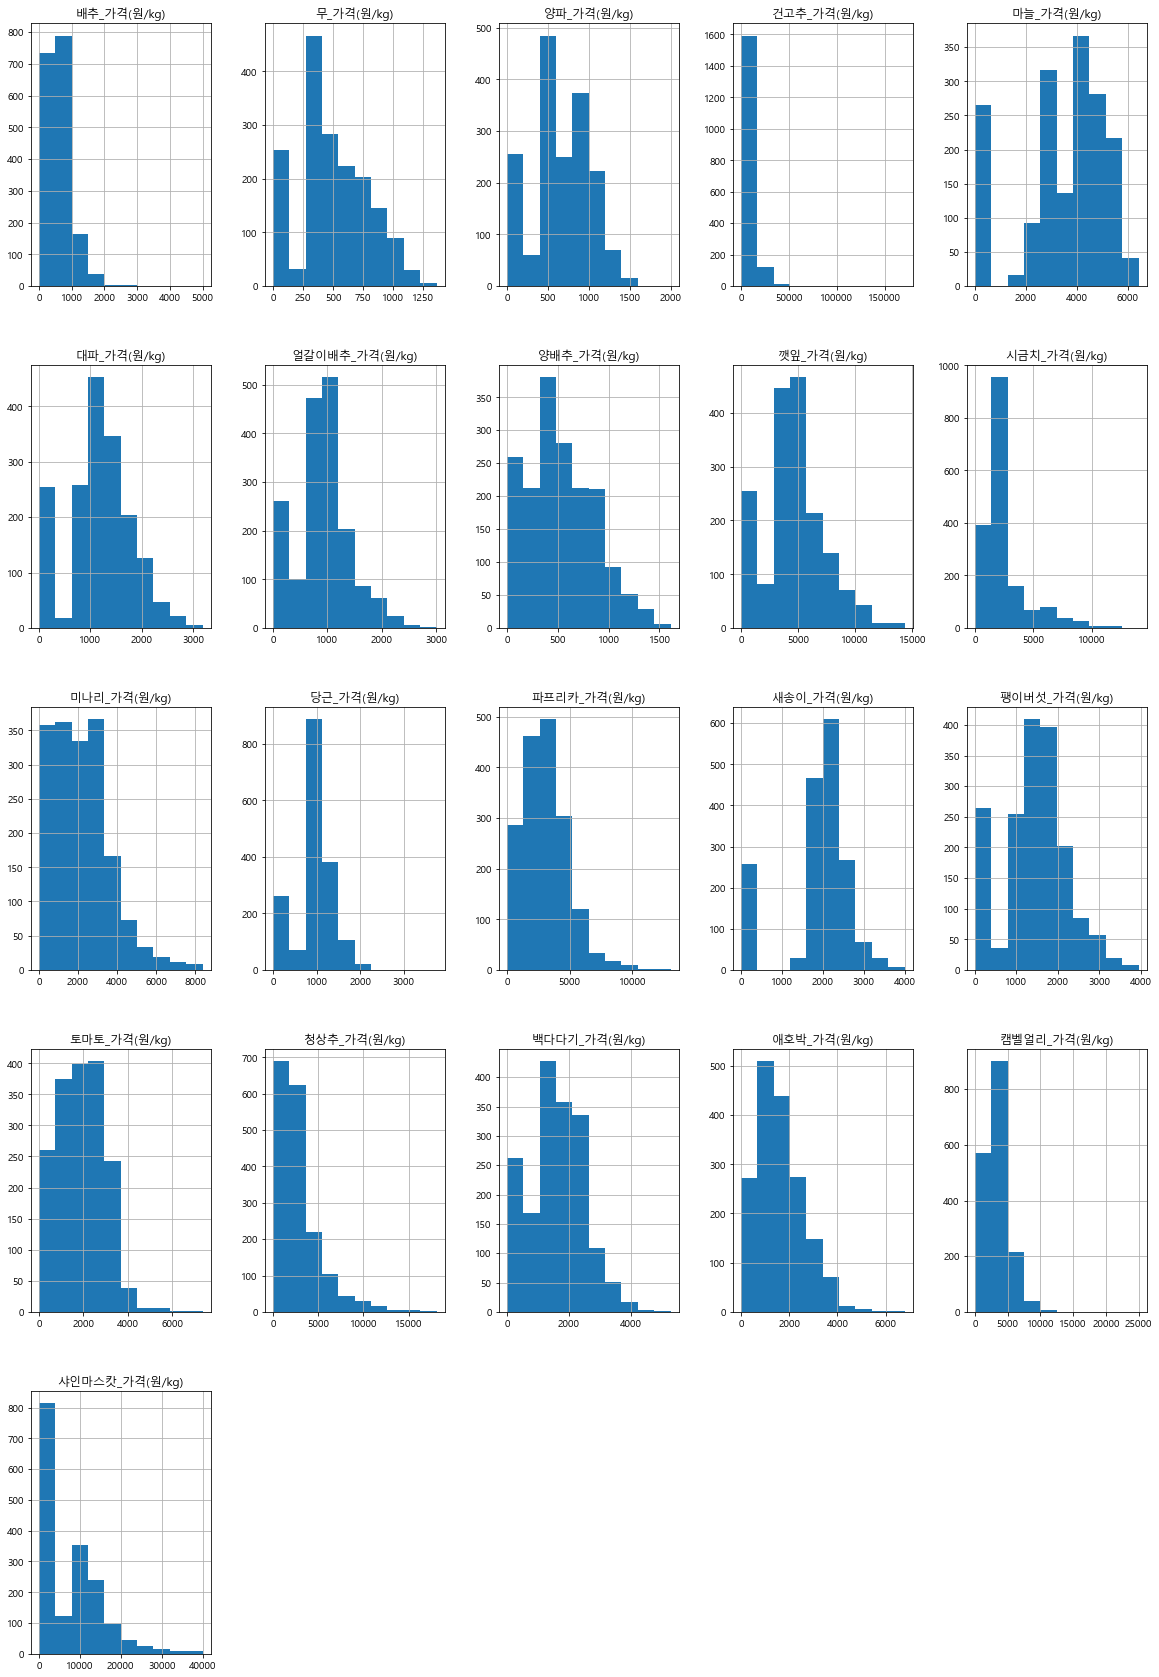

In [12]:
df.iloc[:,3::2].hist(figsize=(20, 30))
plt.show()

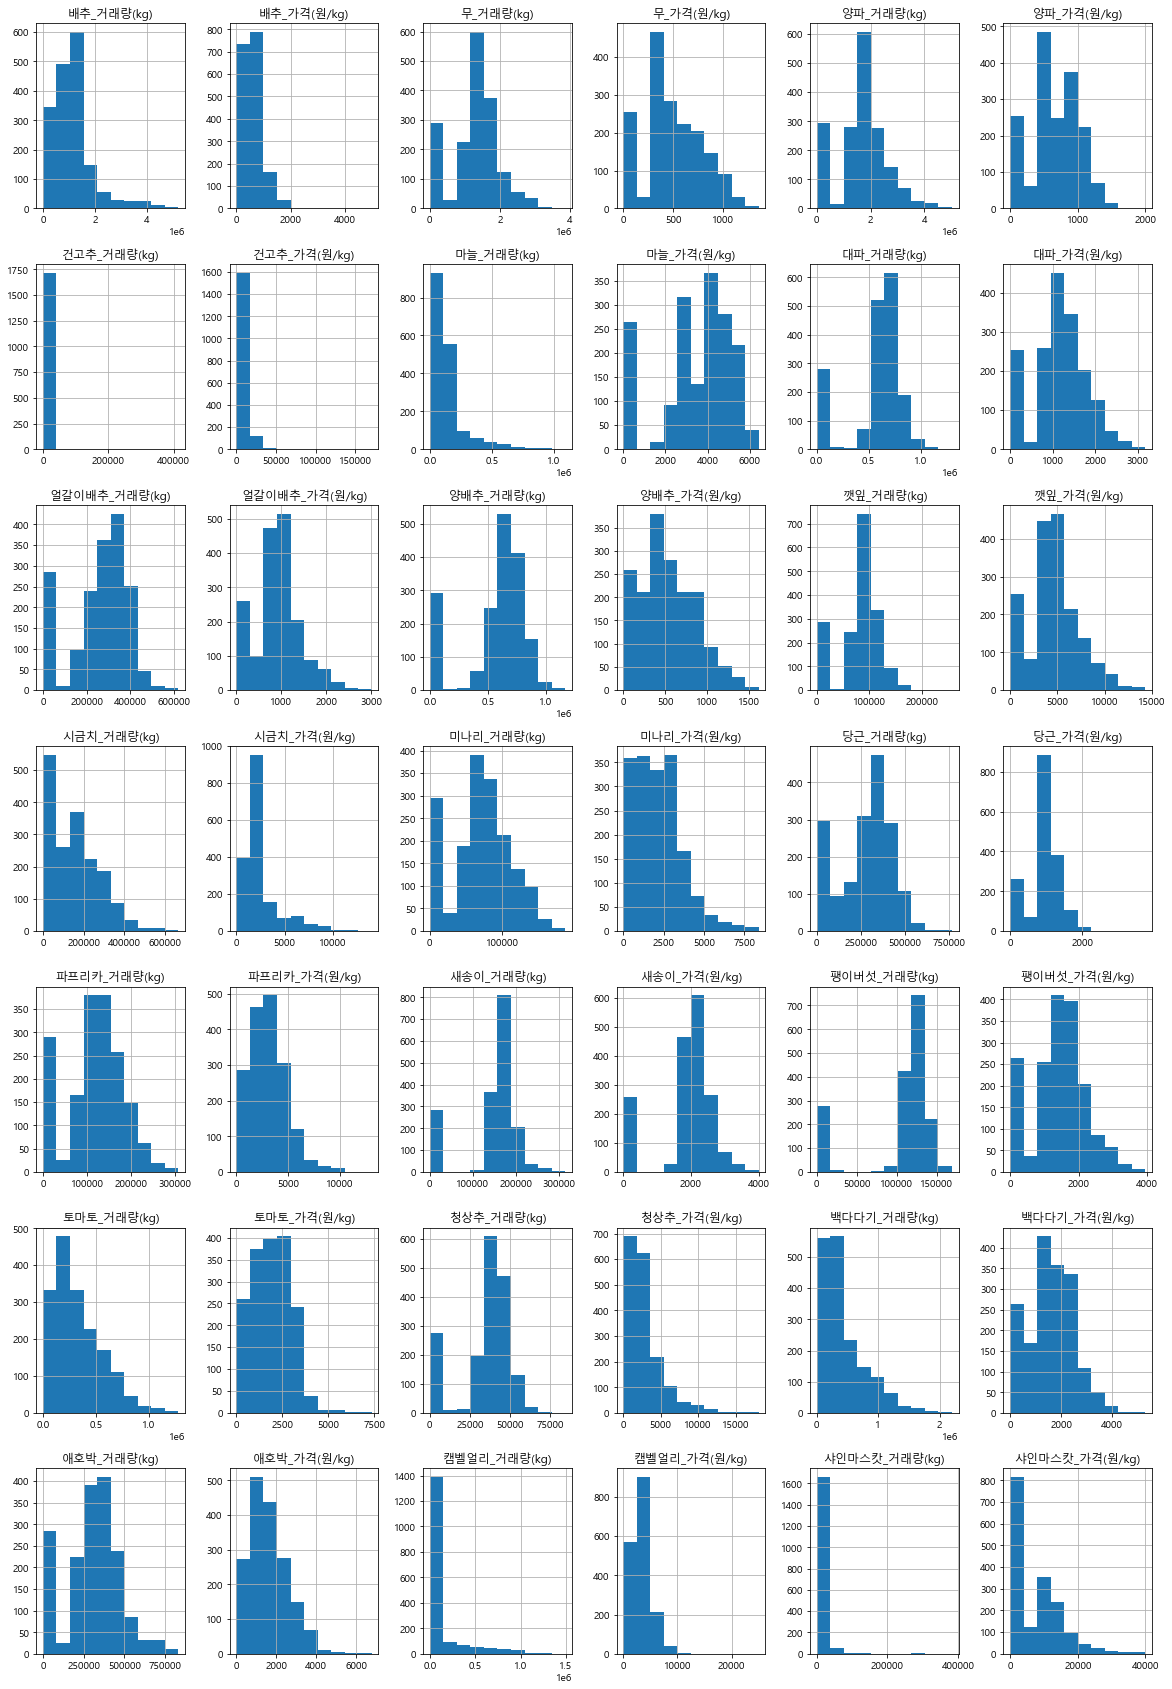

In [13]:
# 거래량
df.iloc[:,2::1].hist(figsize=(20, 30))
plt.show()

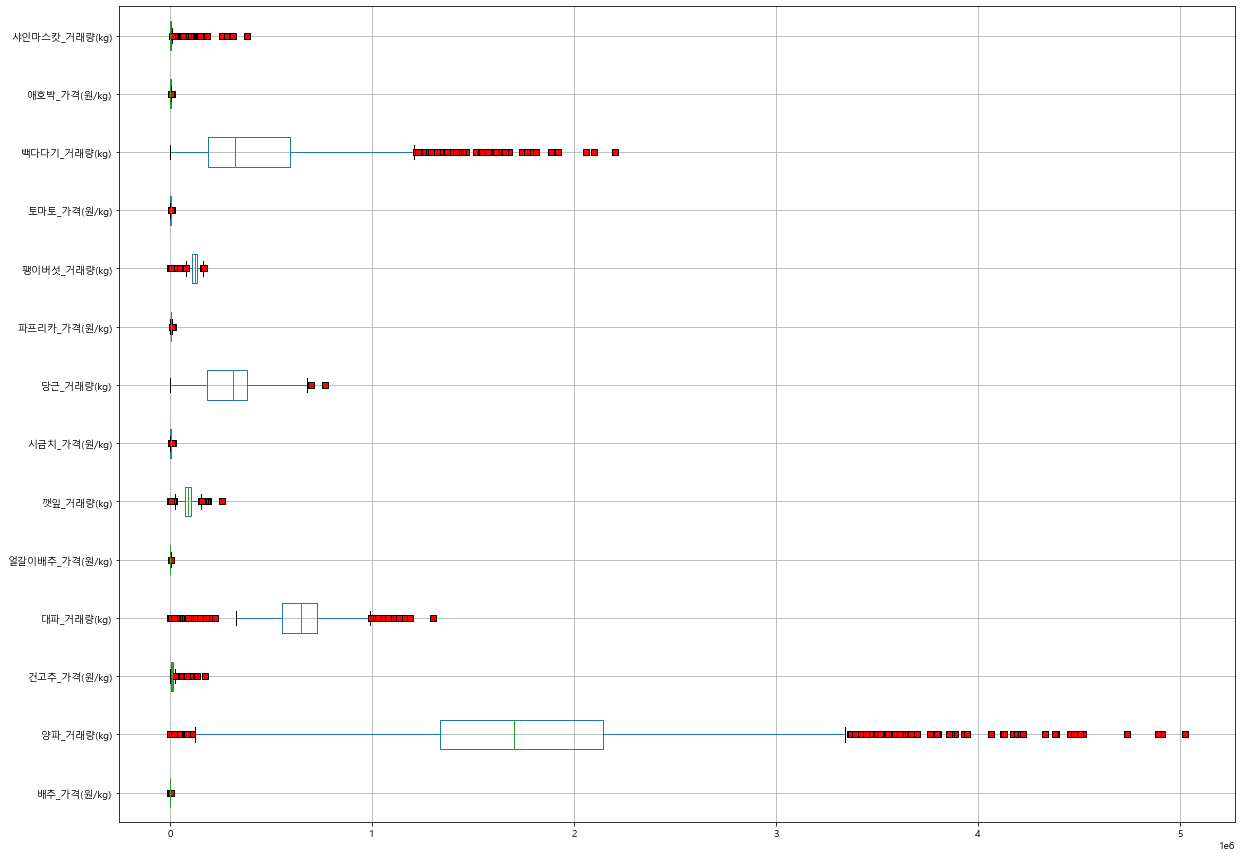

In [14]:
# 이상치 확인
cp_df.iloc[:,3::3].boxplot(figsize=(20, 15)
                                    , vert=False
                                    , flierprops=dict(markerfacecolor='r', marker='s'))
plt.show()

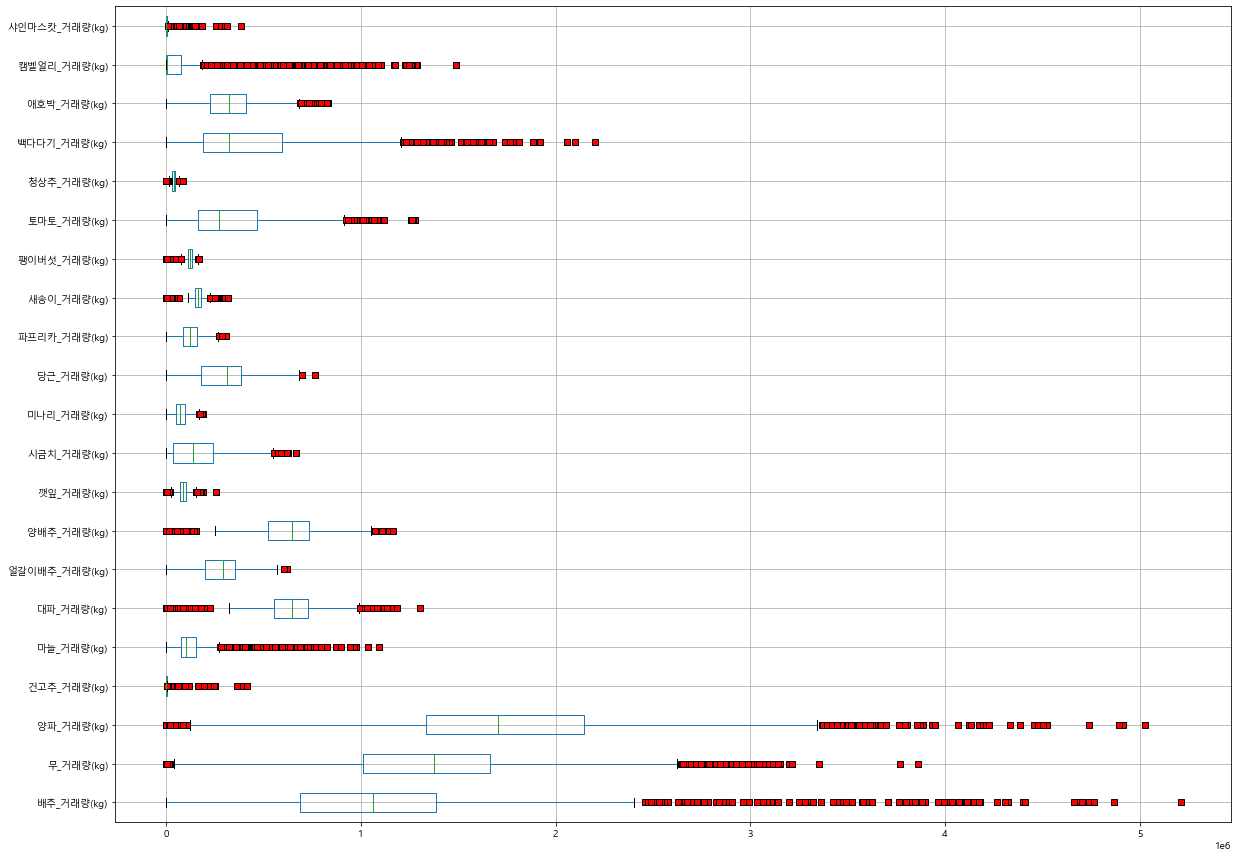

In [15]:
# 이상치 확인
cp_df.iloc[:, ::2].boxplot(figsize=(20, 15)
                                    , vert=False
                                    , flierprops=dict(markerfacecolor='r', marker='s'))
plt.show()

In [16]:
# 이상치에 대한 처리 방안 ? 

# 전처리


In [17]:
# 요일 범주형 > 라벨인코딩 처리
le = LabelEncoder()
le.fit(cp_df.iloc[:, 1])
cp_df['요일']=le.transform(cp_df.iloc[:, 1])

In [18]:
cp_df.head(5)

date  요일  배추_거래량(kg)  배추_가격(원/kg)  무_거래량(kg)  무_가격(원/kg)  양파_거래량(kg)  \
0  2016-01-01   0         0.0          0.0        0.0         0.0         0.0   
1  2016-01-02   5     80860.0        329.0    80272.0       360.0    122787.5   
2  2016-01-03   4         0.0          0.0        0.0         0.0         0.0   
3  2016-01-04   3   1422742.5        478.0  1699653.7       382.0   2315079.0   
4  2016-01-05   6   1167241.0        442.0  1423482.3       422.0   2092960.1   

   양파_가격(원/kg)  건고추_거래량(kg)  건고추_가격(원/kg)  ...  청상추_거래량(kg)  청상추_가격(원/kg)  \
0          0.0          0.0           0.0  ...          0.0           0.0   
1       1281.0          3.0       11000.0  ...       5125.0        9235.0   
2          0.0          0.0           0.0  ...          0.0           0.0   
3       1235.0        699.0        4464.0  ...      38525.5        7631.0   
4       1213.0       1112.6        4342.0  ...      32615.0        6926.0   

   백다다기_거래량(kg)  백다다기_가격(원/kg)  애호박_거래량(kg)  애호박_가격(원/kg)  캠벨얼리_거래량(kg)  \
0           0.0            0.0          0.0           0.0           0.0   
1         434.0         2109.0      19159.0        2414.0         880.0   
2           0.0            0.0          0.0           0.0           0.0   
3      500702.0         2046.0     620539.0        2018.0        2703.8   
4      147638.0         2268.0     231958.0        2178.0        8810.0   

   캠벨얼리_가격(원/kg)  샤인마스캇_거래량(kg)  샤인마스캇_가격(원/kg)  
0            0.0            0.0             0.0  
1         2014.0            0.0             0.0  
2            0.0            0.0             0.0  
3         3885.0            0.0             0.0  
4         2853.0            0.0             0.0  

[5 rows x 44 columns]

In [19]:
# MinMaxScaler 정규화 
minmax = MinMaxScaler()
minmax.fit(cp_df.iloc[:, 1:])
cp_df.iloc[:, 1:]=minmax.transform(cp_df.iloc[:, 1:])
# robust = RobustScaler()
# robust.fit(df.iloc[:, 2:])
# df.iloc[:, 2:]=minmax.transform(df.iloc[:, 2:])

In [20]:
# train set => date 를 제외 
input_col_list = cp_df.iloc[:, 1:].columns 
# ytrain set => date 요일 거래량을 제외 하고 가격 컬럼만 추출 
label_col_list = cp_df.iloc[:, 3::2].columns

In [21]:
print(cp_df.shape)
print("label_col_list", len(label_col_list))
print("input_col_list", len(input_col_list))

(1733, 44)
label_col_list 21
input_col_list 43


In [22]:
# baseline 하이퍼파라미터(참고용)
# device = torch.device("cuda:0")         # GPU 사용
# target_n = 21                           # 맞춰야하는 품목/품종의 수
# learning_rate = 5e-4                    # 학습률
# BATCH_SIZE = 128                        # 배치사이즈
# EPOCHS = 50                             # 총 eopochs
# teacher_forcing = False                 # 교사강요 설정
# n_layers = 3                            # rnn레이어 층
# dropout = 0.2                           # 드롭아웃
# window_size = 7                         # 인코더 시퀀스 길이
# future_size = 7                         # 디코더 시퀀스 길이
# hidden_dim = 128                        # rnn 히든차원
# save_path = f'./models/best_model.pt'   # 모델 저장 경로

In [23]:
cp_df.head(5)

date        요일  배추_거래량(kg)  배추_가격(원/kg)  무_거래량(kg)  무_가격(원/kg)  \
0  2016-01-01  0.000000    0.000000       0.0000   0.000000    0.000000   
1  2016-01-02  0.833333    0.015520       0.0658   0.020797    0.264706   
2  2016-01-03  0.666667    0.000000       0.0000   0.000000    0.000000   
3  2016-01-04  0.500000    0.273068       0.0956   0.440354    0.280882   
4  2016-01-05  1.000000    0.224029       0.0884   0.368802    0.310294   

   양파_거래량(kg)  양파_가격(원/kg)  건고추_거래량(kg)  건고추_가격(원/kg)  ...  청상추_거래량(kg)  \
0    0.000000       0.0000     0.000000      0.000000  ...     0.000000   
1    0.024437       0.6405     0.000007      0.064389  ...     0.060900   
2    0.000000       0.0000     0.000000      0.000000  ...     0.000000   
3    0.460735       0.6175     0.001690      0.026130  ...     0.457792   
4    0.416530       0.6065     0.002690      0.025416  ...     0.387559   

   청상추_가격(원/kg)  백다다기_거래량(kg)  백다다기_가격(원/kg)  애호박_거래량(kg)  애호박_가격(원/kg)  \
0      0.000000      0.000000       0.000000     0.000000      0.000000   
1      0.511068      0.000197       0.398376     0.023032      0.356152   
2      0.000000      0.000000       0.000000     0.000000      0.000000   
3      0.422302      0.227365       0.386475     0.745976      0.297728   
4      0.383287      0.067041       0.428410     0.278846      0.321334   

   캠벨얼리_거래량(kg)  캠벨얼리_가격(원/kg)  샤인마스캇_거래량(kg)  샤인마스캇_가격(원/kg)  
0      0.000000        0.00000            0.0             0.0  
1      0.000590        0.08056            0.0             0.0  
2      0.000000        0.00000            0.0             0.0  
3      0.001814        0.15540            0.0             0.0  
4      0.005911        0.11412            0.0             0.0  

[5 rows x 44 columns]

In [24]:
cp_df.tail(171)

date        요일  배추_거래량(kg)  배추_가격(원/kg)  무_거래량(kg)  무_가격(원/kg)  \
1562  2020-04-11  0.833333    0.089733       0.1516   0.268704    0.266176   
1563  2020-04-12  0.666667    0.000000       0.0000   0.000000    0.000000   
1564  2020-04-13  0.500000    0.190172       0.1442   0.375246    0.288971   
1565  2020-04-14  1.000000    0.162019       0.1472   0.256864    0.352206   
1566  2020-04-15  0.333333    0.163314       0.1462   0.332413    0.338235   
...          ...       ...         ...          ...        ...         ...   
1728  2020-09-24  0.166667    0.356409       0.3678   0.532584    0.727941   
1729  2020-09-25  0.000000    0.360848       0.3578   0.486887    0.743382   
1730  2020-09-26  0.833333    0.318814       0.3520   0.442875    0.790441   
1731  2020-09-27  0.666667    0.004874       0.6132   0.009903    0.837500   
1732  2020-09-28  0.500000    0.461603       0.3734   0.711839    0.843382   

      양파_거래량(kg)  양파_가격(원/kg)  건고추_거래량(kg)  건고추_가격(원/kg)  ...  청상추_거래량(kg)  \
1562    0.420752       0.3890     0.000769      0.235231  ...     0.658856   
1563    0.000000       0.0000     0.000000      0.000000  ...     0.000000   
1564    0.441939       0.4195     0.000762      0.073497  ...     0.726262   
1565    0.433595       0.4235     0.000234      0.067767  ...     0.653828   
1566    0.456438       0.4290     0.001702      0.063974  ...     0.628424   
...          ...          ...          ...           ...  ...          ...   
1728    0.454038       0.4950     0.006813      0.111809  ...     0.602816   
1729    0.412859       0.4775     0.004562      0.135188  ...     0.645499   
1730    0.415758       0.4805     0.002318      0.131764  ...     0.727384   
1731    0.003630       0.5280     0.000145      0.130728  ...     0.001711   
1732    0.444954       0.4820     0.003942      0.128907  ...     1.000000   

      청상추_가격(원/kg)  백다다기_거래량(kg)  백다다기_가격(원/kg)  애호박_거래량(kg)  애호박_가격(원/kg)  \
1562      0.101439      0.360195       0.268417     0.447859      0.207731   
1563      0.000000      0.000000       0.000000     0.000000      0.000000   
1564      0.117100      0.646575       0.240083     0.828459      0.201387   
1565      0.106918      0.355132       0.235927     0.502671      0.200944   
1566      0.097786      0.350223       0.235172     0.493940      0.209649   
...            ...           ...            ...          ...           ...   
1728      0.249530      0.128151       0.566868     0.376438      0.505459   
1729      0.231212      0.141775       0.566490     0.436066      0.495279   
1730      0.208633      0.148668       0.578957     0.469269      0.456182   
1731      0.225567      0.000129       0.700227     0.002962      0.479788   
1732      0.230603      0.251959       0.542690     0.802724      0.410446   

      캠벨얼리_거래량(kg)  캠벨얼리_가격(원/kg)  샤인마스캇_거래량(kg)  샤인마스캇_가격(원/kg)  
1562      0.002087        0.14584       0.000000        0.000000  
1563      0.000000        0.00000       0.000000        0.000000  
1564      0.002004        0.17928       0.000000        0.000000  
1565      0.003240        0.18832       0.000000        0.000000  
1566      0.004723        0.15300       0.000000        0.000000  
...            ...            ...            ...             ...  
1728      0.338341        0.14480       0.740842        0.273500  
1729      0.321862        0.14472       0.794687        0.271100  
1730      0.349917        0.14764       0.819581        0.265900  
1731      0.014572        0.14268       0.025464        0.267475  
1732      0.403829        0.15044       1.000000        0.274950  

[171 rows x 44 columns]

In [25]:
# window_size = 14
# future_size = 14

# # 과거 28일의 변화를 보고 미래 28일을 예측
# x_data = []
# y_data = []

# print("전처리 데이터 확인 : cp_df.shape:{0}\twindows_size:{1}\tfuture_size:{2}\ndata.shape[0]-window_size-future_size:{3}".format(cp_df.shape[0], window_size, future_size, cp_df.shape[0]-window_size-future_size))
# for i in range(cp_df.shape[0]-window_size-future_size):
#     x = cp_df.iloc[i:i+window_size, 1:].to_numpy()
#     y = cp_df.iloc[i+window_size:i+window_size+future_size, 3::2].to_numpy()
#     # y_0 = np.zeros([1, y.shape[1]]) # 디코더 첫 입력값 추가
#     x_data.append(x)
#     # y_data.append(np.concatenate([y_0, y], axis=0))
#     y_data.append(y)

In [26]:
# 56 line 제외 
# label size 21 
# input size 43
# shift 28 > 28일 한 묶음 

# LSTM
# 20일치 데이터를 가지고 다음 가격을 예측
def custom_window_dataset(arg_df, arg_shift=20):
    features = arg_df.iloc[:, 1:].copy()
    
    reframe_dt = pd.DataFrame()
    for sft in range(arg_shift, 0, -1):
        shift_dt = features.shift(periods=sft, axis=0)
        shift_dt.reset_index(drop=True, inplace=True)
        reframe_dt.reset_index(drop=True, inplace=True)
        tmp_df = pd.concat([reframe_dt, shift_dt], axis=1)
        reframe_dt = tmp_df.copy()
        
    new_colnm = [col + '_tg' for col in features.iloc[:, 2::2].columns]

    # shift를 한 데이터와 합쳐서 예측값을 생성
    features_df = pd.DataFrame(features.iloc[:, 2::2].values, columns=new_colnm)
    temp_df = pd.concat([reframe_dt, features_df], axis=1)
    # print(features_df)
    # print(temp_df)
    # NaN 값의 row를 제거
    reframed = temp_df.dropna().copy()
    
    return reframed

In [27]:
# 파라미터 정의
WINDOW_SIZE = 28   # tiemstamp

label_len = len(label_col_list)
features_len = len(input_col_list)

In [28]:
reframed_df = custom_window_dataset(cp_df, WINDOW_SIZE)
# print(reframed_df.shape)

In [29]:
reframed_df

요일  배추_거래량(kg)  배추_가격(원/kg)  무_거래량(kg)  무_가격(원/kg)  양파_거래량(kg)  \
28    0.000000    0.000000       0.0000   0.000000    0.000000    0.000000   
29    0.833333    0.015520       0.0658   0.020797    0.264706    0.024437   
30    0.666667    0.000000       0.0000   0.000000    0.000000    0.000000   
31    0.500000    0.273068       0.0956   0.440354    0.280882    0.460735   
32    1.000000    0.224029       0.0884   0.368802    0.310294    0.416530   
...        ...         ...          ...        ...         ...         ...   
1728  0.166667    0.195776       0.3122   0.319968    0.863971    0.239425   
1729  0.000000    0.146494       0.3128   0.267873    0.771324    0.241746   
1730  0.833333    0.145963       0.2952   0.228952    0.658088    0.317462   
1731  0.666667    0.000000       0.0000   0.000000    0.000000    0.000000   
1732  0.500000    0.276601       0.2266   0.378550    0.652941    0.350403   

      양파_가격(원/kg)  건고추_거래량(kg)  건고추_가격(원/kg)  마늘_거래량(kg)  ...  당근_가격(원/kg)_tg  \
28         0.0000     0.000000      0.000000    0.000000  ...        0.233867   
29         0.6405     0.000007      0.064389    0.013751  ...        0.232800   
30         0.0000     0.000000      0.000000    0.000000  ...        0.266667   
31         0.6175     0.001690      0.026130    0.129684  ...        0.237067   
32         0.6065     0.002690      0.025416    0.115556  ...        0.232800   
...           ...          ...           ...         ...  ...             ...   
1728       0.4530     0.004320      0.152316    0.086058  ...        0.417333   
1729       0.4625     0.022654      0.078186    0.068607  ...        0.472800   
1730       0.4680     0.012158      0.153656    0.076770  ...        0.374667   
1731       0.0000     0.000000      0.000000    0.000000  ...        1.000000   
1732       0.4655     0.015860      0.146837    0.132915  ...        0.533600   

      파프리카_가격(원/kg)_tg  새송이_가격(원/kg)_tg  팽이버섯_가격(원/kg)_tg  토마토_가격(원/kg)_tg  \
28            0.623095          0.80125          0.462161         0.408138   
29            0.681369          0.79300          0.492534         0.403647   
30            0.000000          0.79575          0.000000         0.000000   
31            0.643081          0.86200          0.518097         0.420386   
32            0.606402          0.84050          0.528474         0.393576   
...                ...              ...               ...              ...   
1728          0.704954          0.73175          0.644141         0.760343   
1729          0.695612          0.74850          0.657555         0.761568   
1730          0.704342          0.73550          0.662364         0.716113   
1731          0.000000          0.73650          0.651228         0.514562   
1732          0.719274          0.84000          0.776765         0.683723   

      청상추_가격(원/kg)_tg  백다다기_가격(원/kg)_tg  애호박_가격(원/kg)_tg  캠벨얼리_가격(원/kg)_tg  \
28           0.259159          0.578391         0.547507           0.13476   
29           0.317432          0.637325         0.589112           0.13264   
30           0.299059          0.656215         0.244320           0.00000   
31           0.287050          0.733283         0.623930           0.13716   
32           0.246984          0.767662         0.653290           0.10512   
...               ...               ...              ...               ...   
1728         0.249530          0.566868         0.505459           0.14480   
1729         0.231212          0.566490         0.495279           0.14472   
1730         0.208633          0.578957         0.456182           0.14764   
1731         0.225567          0.700227         0.479788           0.14268   
1732         0.230603          0.542690         0.410446           0.15044   

      샤인마스캇_가격(원/kg)_tg  
28             0.000000  
29             0.000000  
30             0.000000  
31             0.000000  
32             0.000000  
...                 ...  
1728           0.273500  
1729           0.271

In [30]:
# (1-43) / (1-43) (1-43) (1-43) (1-43) 28.....

In [31]:
# 배추 1 / 배추 1 / 배추 1 / 배추 1 28

In [32]:
# xtrain reshape(1733, 28*1) 
# ytrain (1733 , 1*4)

# ytrain[0, [6, 13, 27]]

In [33]:
# cp_df

In [34]:
cp_df.shape, reframed_df.shape

((1733, 44), (1705, 1225))

In [35]:
# 데이터 세트 분할 
# 훈련, 검증, 테스트 데이터 세트 (80, 10, 10) 
n = len(reframed_df)
train_df = reframed_df[0:int(n*0.8)]
val_df = reframed_df[int(n*0.8):int(n*0.9)]
test_df = reframed_df[int(n*0.9):]

num_features = reframed_df.shape[1]

In [36]:
# 분할 데이터 확인 
print(train_df.shape, val_df.shape, test_df.shape)
print(num_features)
print("label_col_list", len(label_col_list))
print("input_col_list", len(input_col_list))

(1364, 1225) (170, 1225) (171, 1225)
1225
label_col_list 21
input_col_list 43


In [37]:
# x_train / y_train

In [38]:
label_col_list = [col for col in train_df.columns if '_tg' in col]
# label_col_list

In [39]:
# 입력값과 출력값으로 분리
train_X, train_y = train_df.iloc[:, :features_len*WINDOW_SIZE], train_df.loc[:,label_col_list]
val_X, val_y = val_df.iloc[:, :features_len*WINDOW_SIZE], val_df.loc[:,label_col_list]
test_X, test_y = test_df.iloc[:, :features_len*WINDOW_SIZE], test_df.loc[:,label_col_list]

In [40]:
# 범위, 타임스탬프, 컬럼
train_X = train_X.values.reshape((train_X.shape[0], WINDOW_SIZE, features_len))
val_X = val_X.values.reshape((val_X.shape[0], WINDOW_SIZE, features_len))
test_X = test_X.values.reshape((test_X.shape[0], WINDOW_SIZE, features_len))

In [41]:
train_y = train_y.values.reshape((train_y.shape[0], 1, train_y.shape[1]))
val_y = val_y.values.reshape((val_y.shape[0], 1, val_y.shape[1]))
test_y = test_y.values.reshape((test_y.shape[0], 1, test_y.shape[1]))
# print(so_train_X.shape, train_y.shape, test_X.shape, test_y.shape)


In [42]:
print(train_X.shape, len(train_X), train_y.shape)
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1364, 28, 43) 1364 (1364, 1, 21)
(1364, 28, 43) (1364, 1, 21) (171, 28, 43) (171, 1, 21)


In [43]:
print(train_X.shape, train_y.shape)
print(val_X.shape, val_y.shape)
print(test_X.shape, test_y.shape)

(1364, 28, 43) (1364, 1, 21)
(170, 28, 43) (170, 1, 21)
(171, 28, 43) (171, 1, 21)


In [44]:
def seed_init(arg_seed: int = 1031):
    keras.backend.clear_session()
    np.random.seed(arg_seed)
    tf.random.set_seed(arg_seed)

In [45]:
def model_perfomance_print(arg_model, arg_model_nm,arg_val_X, arg_val_y, arg_test_X, arg_test_y, arg_flag):
    val_X = arg_val_X
    val_y = arg_val_y 
    
    test_X = arg_test_X
    test_y = arg_test_y       
    
    model = arg_model         # 모델
    model_name = arg_model_nm # 모델 명칭
    
    val_pfmc_dict = {}
    pfmc_dict = {}
    
    #  검증 데이터로 예측모델 평가
    val_evaluate = model.evaluate(val_X, val_y, verbose=2)
    val_pfmc_dict[model_name] = val_evaluate
    #  테스트 데이터로 예측모델 평가
    test_evaluate = model.evaluate(test_X, test_y, verbose=2)
    pfmc_dict[model_name] = test_evaluate
    print("검증 데이터로 예측모델 평가: ", val_evaluate)
    print("테스트 데이터로 예측모델 평가", test_evaluate)

    # r2 score value 
    yhat = model.predict(test_X)
    # yhat.shape
    # yhat = yhat.reshape(yhat.shape[0], 1, yhat.shape[1])
    if arg_flag: 
        r2_test_y = test_y.reshape(test_y.shape[0], test_y.shape[2])
        print("r2 score :", r2_score(r2_test_y, yhat))
    
    return val_pfmc_dict, pfmc_dict

In [46]:
def prediction_plot_show(arg_test, arg_pred):    
    test_y_df = pd.DataFrame(arg_test.reshape(arg_test.shape[0]*arg_test.shape[1], arg_test.shape[2]))
    pred_df=pd.DataFrame(arg_pred)
        
    # 예측 데이터 시각화 
    plt.figure(figsize=(20, 10))
    plt.plot(test_y_df.iloc[:, 1], label='actual')
    plt.plot(pred_df.iloc[:, 1], label='prediction')
    plt.legend()
    plt.show()

In [47]:
def perfomance_plot_show(arg_hist):
    hist = arg_hist
    
    # 예측모델 평가 시각화 
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()
    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
    acc_ax.plot(hist.history['mae'], 'b', label='train mae')
    acc_ax.plot(hist.history['val_mae'], 'g', label='val mae')

    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('mae')

    loss_ax.legend(loc='upper left')
    acc_ax.legend(loc='lower left')
    pyplot.show()

    plt.subplot(2, 1 , 1)
    # plot history
    pyplot.plot(hist.history['loss'], label='train')
    pyplot.plot(hist.history['val_loss'], label='test')
    pyplot.legend()
    pyplot.show()

In [48]:
# 모델 컴파일 및 학습
def model_complie_fit(arg_model, arg_trainx, arg_trainy, arg_valx, arg_valy, arg_patience=10):    
    # init 
    global lr
    global save_path
    global EPOCHS
    global BATCH_SIZE
    patience = arg_patience
    
    train_X = arg_trainx.copy()
    train_y = arg_trainy.copy()
    
    val_X = arg_valx.copy()
    val_y = arg_valy.copy()
    model = arg_model
        
    # 옵티마이저 및 로스 함수 정의 
    optimizer_func = keras.optimizers.Adam(learning_rate=lr)
    # loss_func = keras.losses.MeanAbsoluteError() # MAE 
    loss_func = keras.losses.Huber() # Huber 사용 MAE, MSE 를 합친 outlier 의 영향을 덜 받음  

    # earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
    earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss'
                                                , patience=patience
                                                , mode='min')
    # val_loss 기준 체크포인터 생성합니다.
    checkpoint = keras.callbacks.ModelCheckpoint(save_path, 
                                                save_weights_only=True, 
                                                save_best_only=True, 
                                                monitor='val_loss', 
                                                verbose=1)
    model.compile(loss=loss_func,
                optimizer=optimizer_func,
                metrics=["mae"])

    print("optimizer : Adam \tlearning_rate: ", lr)
    print("obtimizer_function: [{0}]".format(optimizer_func))
    print("loss_function: [{0}]".format(loss_func.fn))
    print("metrics: mae")
    print("="*100)
    print("epochs: {0} \t배치 사이즈 : {1}".format(EPOCHS, BATCH_SIZE))
    print("callbacks early_stopping: [{0}] \tpatience: [{1}]".format(earlystopping.monitor, patience))
    print("="*100)
    
    history=model.fit(train_X, train_y, epochs=EPOCHS, batch_size=BATCH_SIZE
                            , validation_data=(val_X, val_y), callbacks=[checkpoint, earlystopping]
                            , verbose=2, shuffle=False)
    return history

In [49]:
# 하이퍼파라미터 전역변수
# device = torch.device("cuda:0")       # GPU 사용

# 입력/출력 품목/품종의 수
features_n = 43                         # 입력 품목/품종의 수
target_n = 21                           # 맞춰야하는 품목/품종의 수

BATCH_SIZE = 32                         # 배치사이즈
EPOCHS = 100                            # 총 eopochs
dropout = 0.2                           # 드롭아웃
# save_path = f'./best_model.h5'        # 모델 저장 경로
save_path = 'best_model.h5'             # 모델 저장 경로

# Optimizer 함수 최적화 함수 파라미터
# learning_rate
lr_list = [1e-5, 1e-4, 1e-3, 5e-4]      # 0.01 기준으로
# lr = lr_list[1]                       # 학습률 0.0005
lr = 3e-4                              # 학습률 0.0005

# Loss(cost) 함수 손실 함수 파라미터
# CNN + RNN 하이퍼 파라미터 
CONV_WIDTH = [3, 5]
filter_size = 64

In [50]:
seed_init(1031)

In [51]:
# 모델 구성 CNN + LSTM
conv_lstm_model = keras.Sequential([
    keras.layers.Conv1D(filters=filter_size, kernel_size=(CONV_WIDTH[1], ),
                           strides=1, padding="causal", 
                           activation="relu", 
                           input_shape=[WINDOW_SIZE, features_n]), 
    keras.layers.LSTM(64, activation="relu", return_sequences=True),
    keras.layers.LSTM(32, activation="relu", return_sequences=False),
    # keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(target_n),
    # keras.layers.Lambda(lambda x: x * 200)
])
conv_lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 28, 64)            13824     
_________________________________________________________________
lstm (LSTM)                  (None, 28, 64)            33024     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense (Dense)                (None, 21)                693       
Total params: 59,957
Trainable params: 59,957
Non-trainable params: 0
_________________________________________________________________


In [52]:
hist = model_complie_fit(conv_lstm_model, train_X, train_y, val_X, val_y)

optimizer : Adam 	learning_rate:  0.0003
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x0000021A2E754370>]
loss_function: [<function huber at 0x0000021A28DBB5E0>]
metrics: mae
epochs: 100 	배치 사이즈 : 32
callbacks early_stopping: [val_loss] 	patience: [10]
Epoch 1/100

Epoch 00001: val_loss improved from inf to 0.03262, saving model to best_model.h5
43/43 - 2s - loss: 0.0402 - mae: 0.2167 - val_loss: 0.0326 - val_mae: 0.2070
Epoch 2/100

Epoch 00002: val_loss improved from 0.03262 to 0.02284, saving model to best_model.h5
43/43 - 1s - loss: 0.0229 - mae: 0.1670 - val_loss: 0.0228 - val_mae: 0.1737
Epoch 3/100

Epoch 00003: val_loss improved from 0.02284 to 0.01912, saving model to best_model.h5
43/43 - 1s - loss: 0.0171 - mae: 0.1408 - val_loss: 0.0191 - val_mae: 0.1543
Epoch 4/100

Epoch 00004: val_loss improved from 0.01912 to 0.01796, saving model to best_model.h5
43/43 - 1s - loss: 0.0148 - mae: 0.1262 - val_loss: 0.0180 - val_mae: 0.1474
Epoch 5/100


In [53]:
# # pd.set_option('display.max_columns', 200)
# # row 생략 없이 출력
# pd.set_option('display.max_rows', None)
# # col 생략 없이 출력
# pd.set_option('display.max_columns', None)

In [54]:
# 저장한 데이터를 로드
conv_lstm_model.load_weights("best_model.h5")
# conv_lstm_model = keras.models.load_weights("best_model.h5")
pred = conv_lstm_model.predict(test_X)

In [55]:
val_performance_dict = {}
performance_dict = {}
val_performance_dict, performance_dict = model_perfomance_print(conv_lstm_model, "CNN_LSTM", val_X, val_y, test_X, test_y, True)

6/6 - 0s - loss: 0.0159 - mae: 0.1309
6/6 - 0s - loss: 0.0147 - mae: 0.1205
검증 데이터로 예측모델 평가:  [0.01594291627407074, 0.13089041411876678]
테스트 데이터로 예측모델 평가 [0.014736359938979149, 0.1204947754740715]
r2 score : 0.1700695189228028


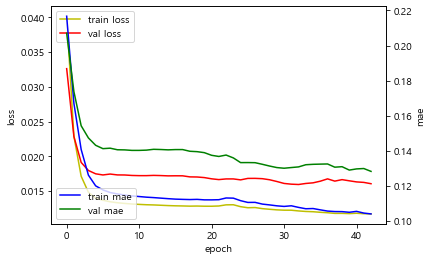

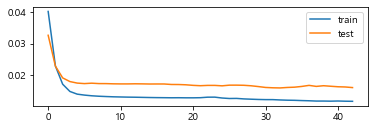

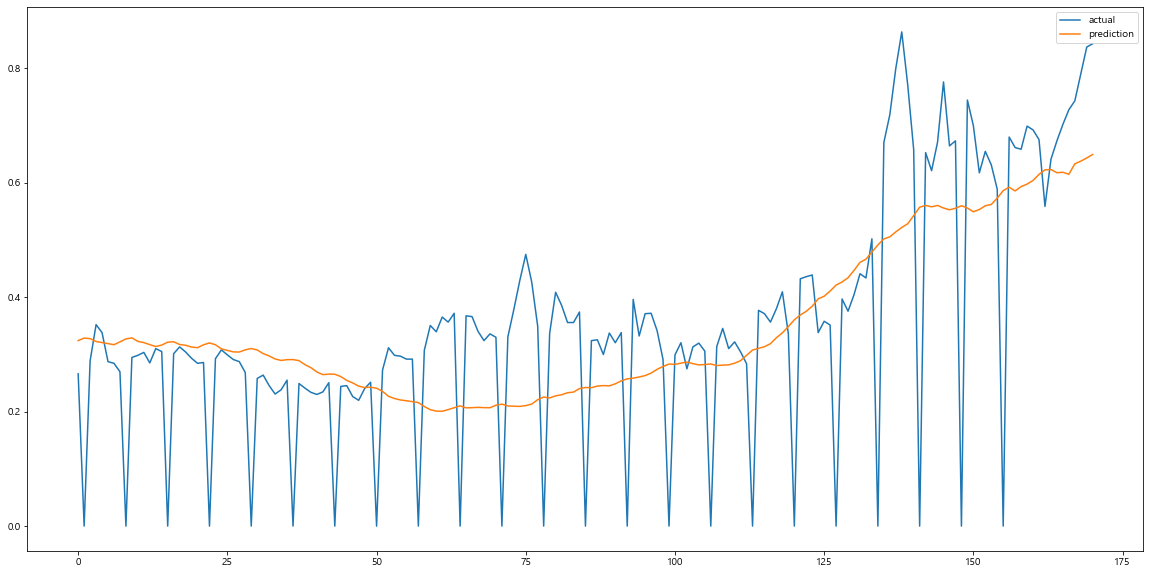

In [56]:
perfomance_plot_show(hist)
prediction_plot_show(test_y, pred)

In [57]:
reframed_df

요일  배추_거래량(kg)  배추_가격(원/kg)  무_거래량(kg)  무_가격(원/kg)  양파_거래량(kg)  \
28    0.000000    0.000000       0.0000   0.000000    0.000000    0.000000   
29    0.833333    0.015520       0.0658   0.020797    0.264706    0.024437   
30    0.666667    0.000000       0.0000   0.000000    0.000000    0.000000   
31    0.500000    0.273068       0.0956   0.440354    0.280882    0.460735   
32    1.000000    0.224029       0.0884   0.368802    0.310294    0.416530   
...        ...         ...          ...        ...         ...         ...   
1728  0.166667    0.195776       0.3122   0.319968    0.863971    0.239425   
1729  0.000000    0.146494       0.3128   0.267873    0.771324    0.241746   
1730  0.833333    0.145963       0.2952   0.228952    0.658088    0.317462   
1731  0.666667    0.000000       0.0000   0.000000    0.000000    0.000000   
1732  0.500000    0.276601       0.2266   0.378550    0.652941    0.350403   

      양파_가격(원/kg)  건고추_거래량(kg)  건고추_가격(원/kg)  마늘_거래량(kg)  ...  당근_가격(원/kg)_tg  \
28         0.0000     0.000000      0.000000    0.000000  ...        0.233867   
29         0.6405     0.000007      0.064389    0.013751  ...        0.232800   
30         0.0000     0.000000      0.000000    0.000000  ...        0.266667   
31         0.6175     0.001690      0.026130    0.129684  ...        0.237067   
32         0.6065     0.002690      0.025416    0.115556  ...        0.232800   
...           ...          ...           ...         ...  ...             ...   
1728       0.4530     0.004320      0.152316    0.086058  ...        0.417333   
1729       0.4625     0.022654      0.078186    0.068607  ...        0.472800   
1730       0.4680     0.012158      0.153656    0.076770  ...        0.374667   
1731       0.0000     0.000000      0.000000    0.000000  ...        1.000000   
1732       0.4655     0.015860      0.146837    0.132915  ...        0.533600   

      파프리카_가격(원/kg)_tg  새송이_가격(원/kg)_tg  팽이버섯_가격(원/kg)_tg  토마토_가격(원/kg)_tg  \
28            0.623095          0.80125          0.462161         0.408138   
29            0.681369          0.79300          0.492534         0.403647   
30            0.000000          0.79575          0.000000         0.000000   
31            0.643081          0.86200          0.518097         0.420386   
32            0.606402          0.84050          0.528474         0.393576   
...                ...              ...               ...              ...   
1728          0.704954          0.73175          0.644141         0.760343   
1729          0.695612          0.74850          0.657555         0.761568   
1730          0.704342          0.73550          0.662364         0.716113   
1731          0.000000          0.73650          0.651228         0.514562   
1732          0.719274          0.84000          0.776765         0.683723   

      청상추_가격(원/kg)_tg  백다다기_가격(원/kg)_tg  애호박_가격(원/kg)_tg  캠벨얼리_가격(원/kg)_tg  \
28           0.259159          0.578391         0.547507           0.13476   
29           0.317432          0.637325         0.589112           0.13264   
30           0.299059          0.656215         0.244320           0.00000   
31           0.287050          0.733283         0.623930           0.13716   
32           0.246984          0.767662         0.653290           0.10512   
...               ...               ...              ...               ...   
1728         0.249530          0.566868         0.505459           0.14480   
1729         0.231212          0.566490         0.495279           0.14472   
1730         0.208633          0.578957         0.456182           0.14764   
1731         0.225567          0.700227         0.479788           0.14268   
1732         0.230603          0.542690         0.410446           0.15044   

      샤인마스캇_가격(원/kg)_tg  
28             0.000000  
29             0.000000  
30             0.000000  
31             0.000000  
32             0.000000  
...                 ...  
1728           0.273500  
1729           0.271

In [58]:
# 다중 입력 단일 출력 CNN + LSTM 모델

In [59]:
# 하이퍼파라미터 전역변수
# device = torch.device("cuda:0")       # GPU 사용

# 입력/출력 품목/품종의 수
features_n = 43                         # 입력 품목/품종의 수
target_n = 21                           # 맞춰야하는 품목/품종의 수

BATCH_SIZE = 32                         # 배치사이즈
EPOCHS = 100                            # 총 eopochs
dropout = 0.2                           # 드롭아웃
# save_path = f'./best_model.h5'        # 모델 저장 경로
save_path = 'best_model.h5'             # 모델 저장 경로

# Optimizer 함수 최적화 함수 파라미터
# learning_rate
lr_list = [1e-5, 1e-4, 1e-3, 5e-4]      # 0.01 기준으로
# lr = lr_list[1]                       # 학습률 0.0005
lr = 30e-5                              # 학습률 0.0005

# Loss(cost) 함수 손실 함수 파라미터
# CNN + RNN 하이퍼 파라미터 
CONV_WIDTH = [3, 5]
filter_size = 32

In [60]:
seed_init(1031)

In [61]:
# 양배추, 시금치, 미나리, 파프리카, 새송이, 당근
print(label_col_list)
# label_col_list = ['양배추_가격(원/kg)_tg', '시금치_가격(원/kg)_tg', '미나리_가격(원/kg)_tg'
#                   , '파프리카_가격(원/kg)_tg', '새송이_가격(원/kg)_tg', '당근_가격(원/kg)_tg']

# for col in label_col_list:
#     if "양배추" in col:

['배추_가격(원/kg)_tg', '무_가격(원/kg)_tg', '양파_가격(원/kg)_tg', '건고추_가격(원/kg)_tg', '마늘_가격(원/kg)_tg', '대파_가격(원/kg)_tg', '얼갈이배추_가격(원/kg)_tg', '양배추_가격(원/kg)_tg', '깻잎_가격(원/kg)_tg', '시금치_가격(원/kg)_tg', '미나리_가격(원/kg)_tg', '당근_가격(원/kg)_tg', '파프리카_가격(원/kg)_tg', '새송이_가격(원/kg)_tg', '팽이버섯_가격(원/kg)_tg', '토마토_가격(원/kg)_tg', '청상추_가격(원/kg)_tg', '백다다기_가격(원/kg)_tg', '애호박_가격(원/kg)_tg', '캠벨얼리_가격(원/kg)_tg', '샤인마스캇_가격(원/kg)_tg']


배추_가격(원/kg)_tg 예측 모델 
(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 28, 32)            6912      
_________________________________________________________________
lstm (LSTM)                  (None, 28, 32)            8320      
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 23,585
Trainable params: 23,585
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0003
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x0000021A313BCCD0>]
loss_function: [

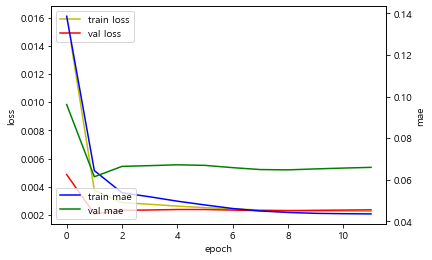

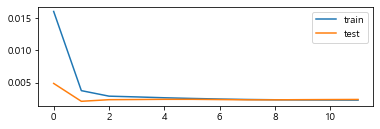

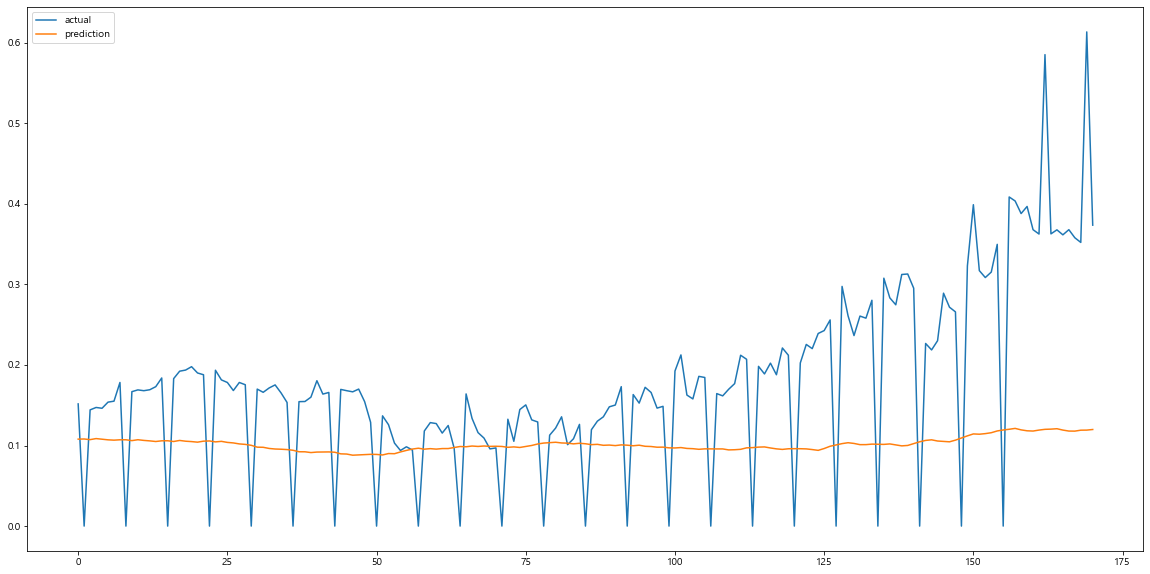

무_가격(원/kg)_tg 예측 모델 
(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 28, 32)            6912      
_________________________________________________________________
lstm_2 (LSTM)                (None, 28, 32)            8320      
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 23,585
Trainable params: 23,585
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0003
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x0000021A31AD7BE0>]
loss_function: 

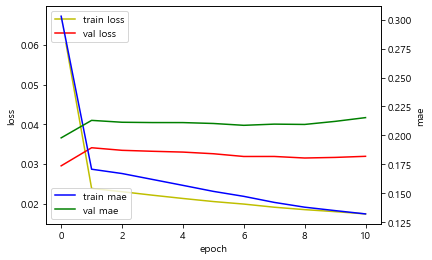

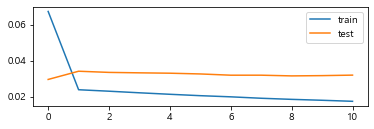

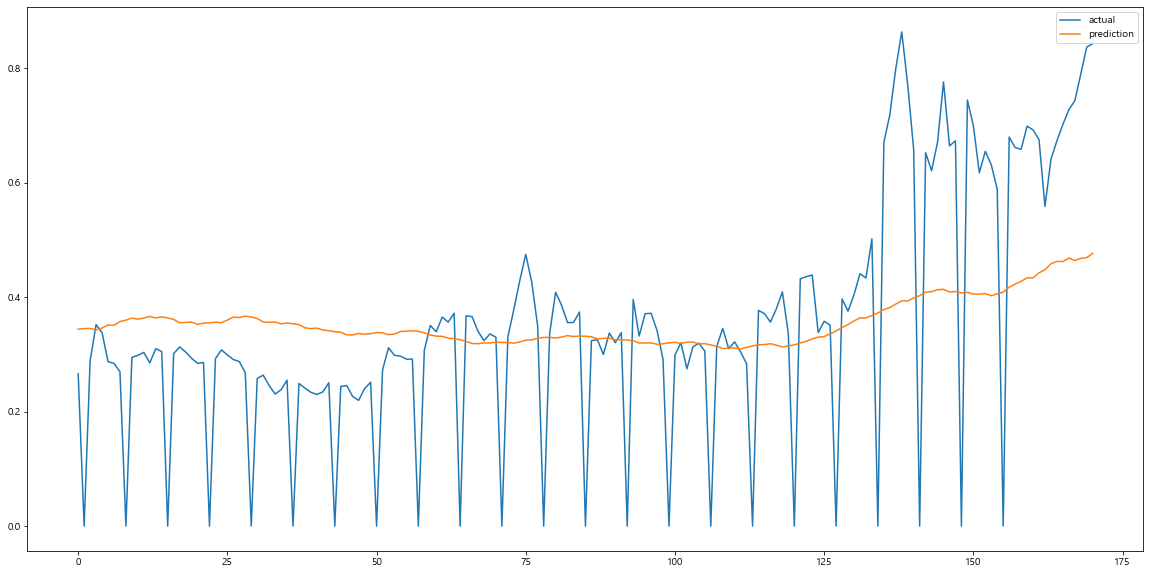

양파_가격(원/kg)_tg 예측 모델 
(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 28, 32)            6912      
_________________________________________________________________
lstm_4 (LSTM)                (None, 28, 32)            8320      
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 23,585
Trainable params: 23,585
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0003
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x0000021A35D5C550>]
loss_function:

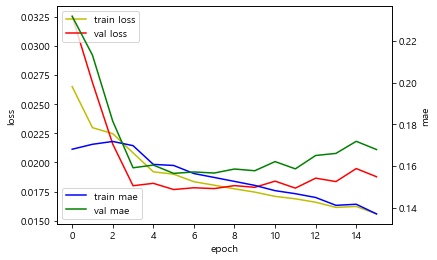

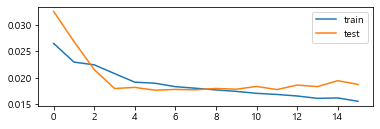

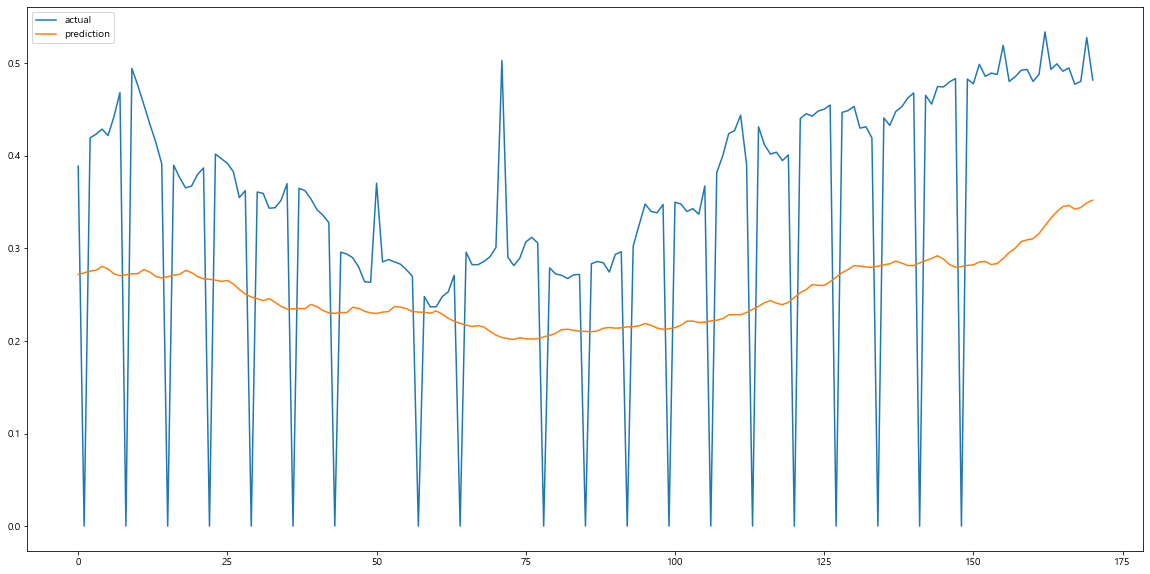

건고추_가격(원/kg)_tg 예측 모델 
(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 28, 32)            6912      
_________________________________________________________________
lstm_6 (LSTM)                (None, 28, 32)            8320      
_________________________________________________________________
lstm_7 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 23,585
Trainable params: 23,585
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0003
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x0000021A318CF850>]
loss_function

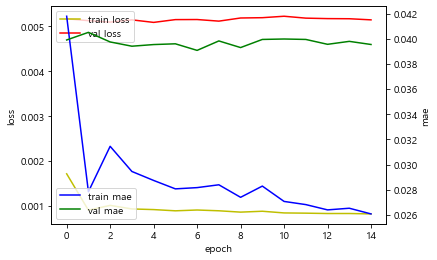

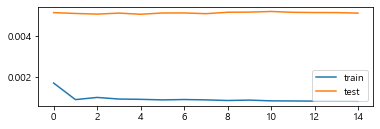

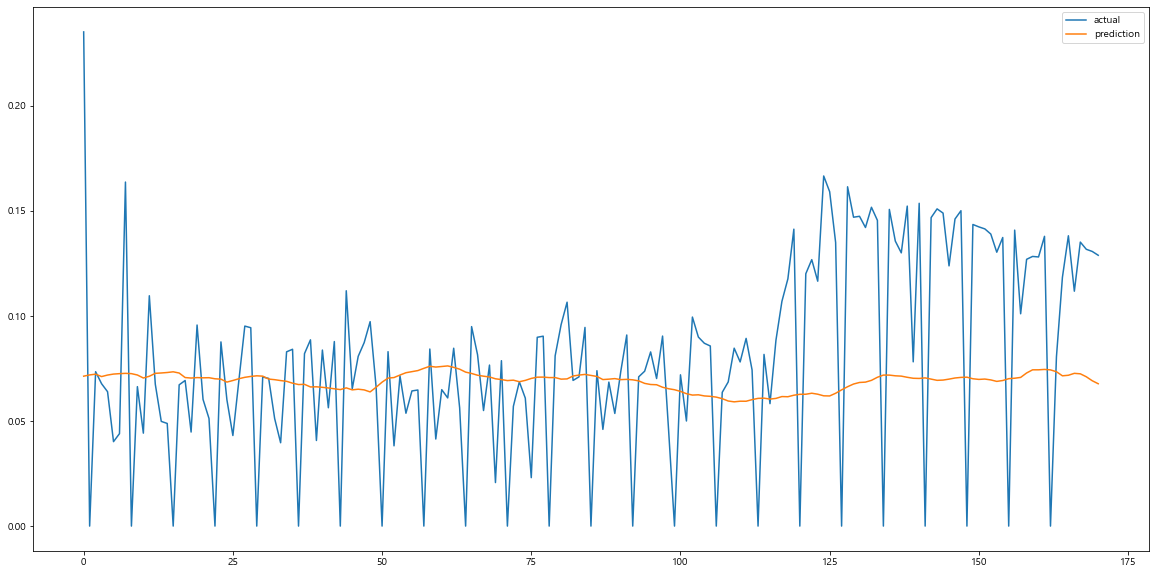

마늘_가격(원/kg)_tg 예측 모델 
(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 28, 32)            6912      
_________________________________________________________________
lstm_8 (LSTM)                (None, 28, 32)            8320      
_________________________________________________________________
lstm_9 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 23,585
Trainable params: 23,585
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0003
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x0000021A3152B700>]
loss_function:

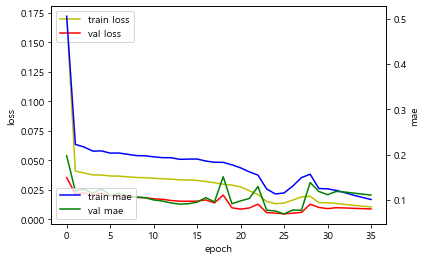

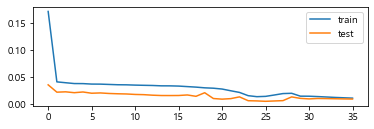

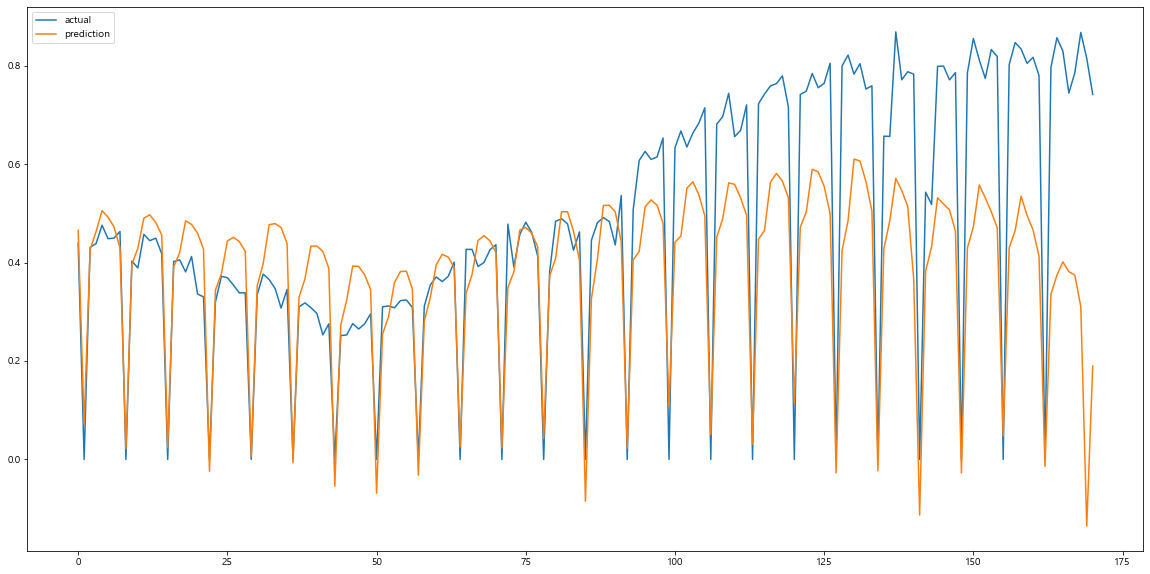

대파_가격(원/kg)_tg 예측 모델 
(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 28, 32)            6912      
_________________________________________________________________
lstm_10 (LSTM)               (None, 28, 32)            8320      
_________________________________________________________________
lstm_11 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 23,585
Trainable params: 23,585
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0003
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x0000021A327341C0>]
loss_function:

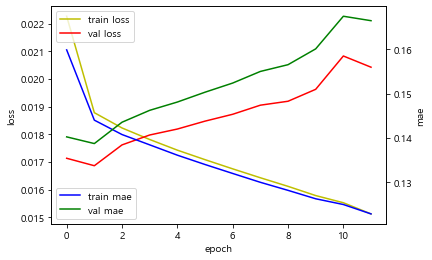

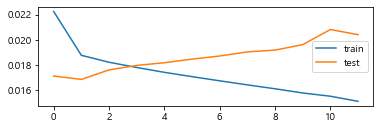

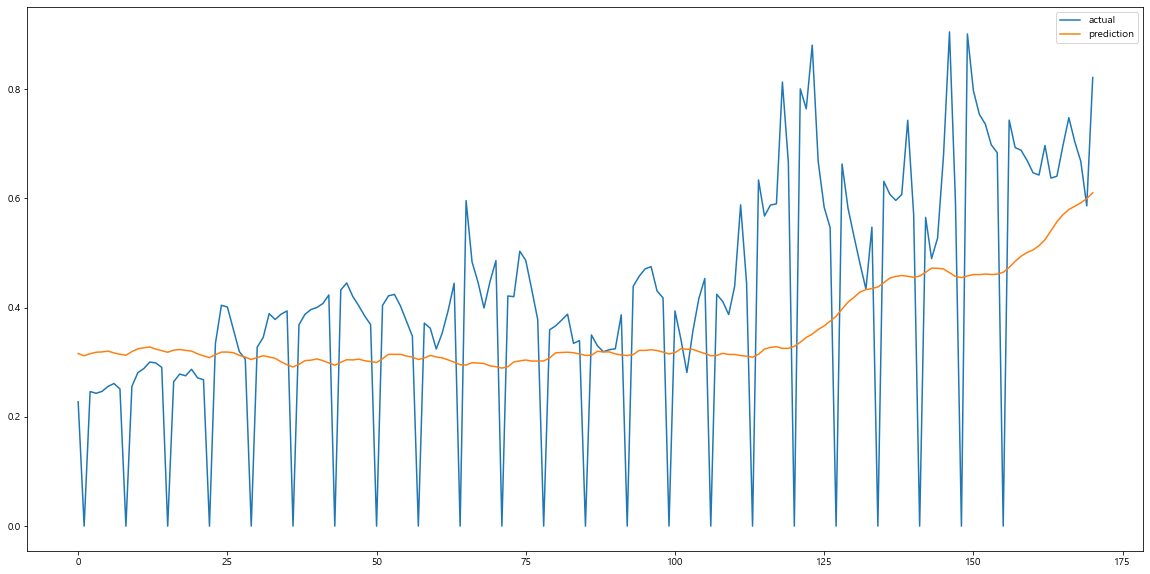

얼갈이배추_가격(원/kg)_tg 예측 모델 
(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 28, 32)            6912      
_________________________________________________________________
lstm_12 (LSTM)               (None, 28, 32)            8320      
_________________________________________________________________
lstm_13 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 23,585
Trainable params: 23,585
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0003
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x0000021A2F37A400>]
loss_functi

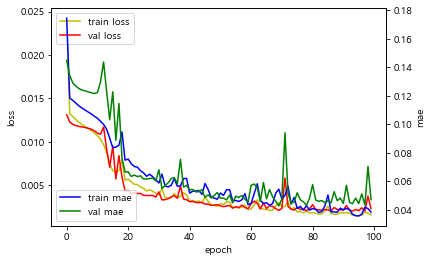

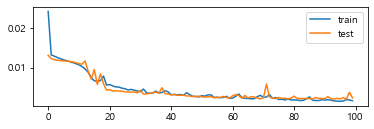

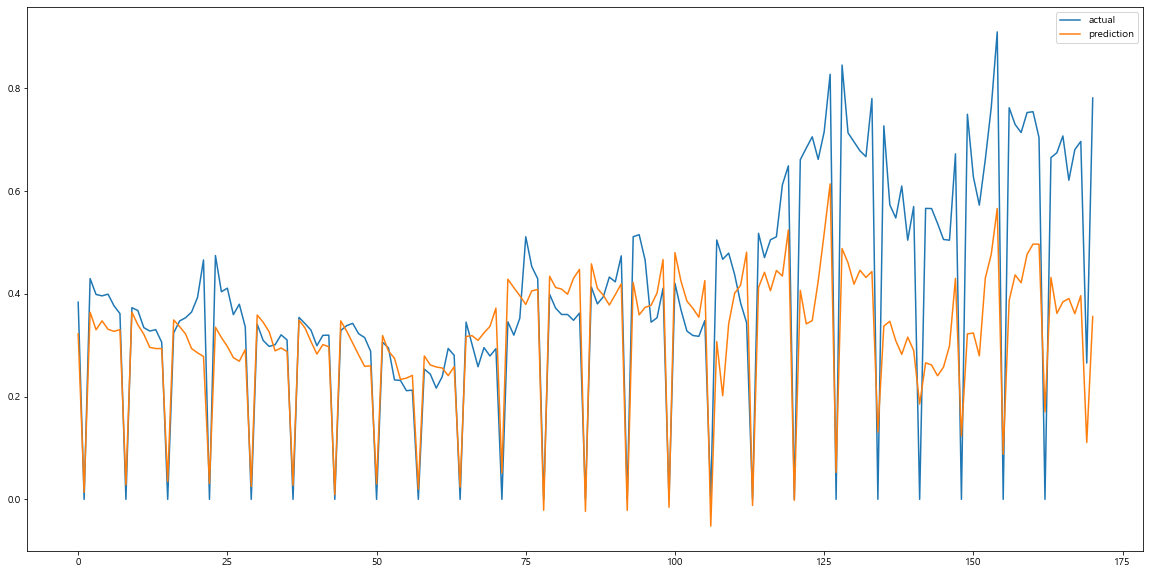

양배추_가격(원/kg)_tg 예측 모델 
(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 28, 32)            6912      
_________________________________________________________________
lstm_14 (LSTM)               (None, 28, 32)            8320      
_________________________________________________________________
lstm_15 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 23,585
Trainable params: 23,585
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0003
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x0000021A2FF94670>]
loss_function

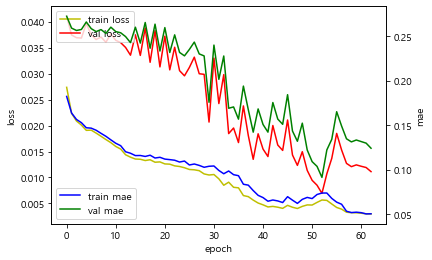

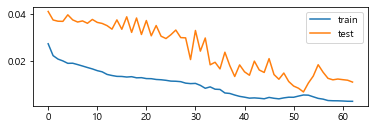

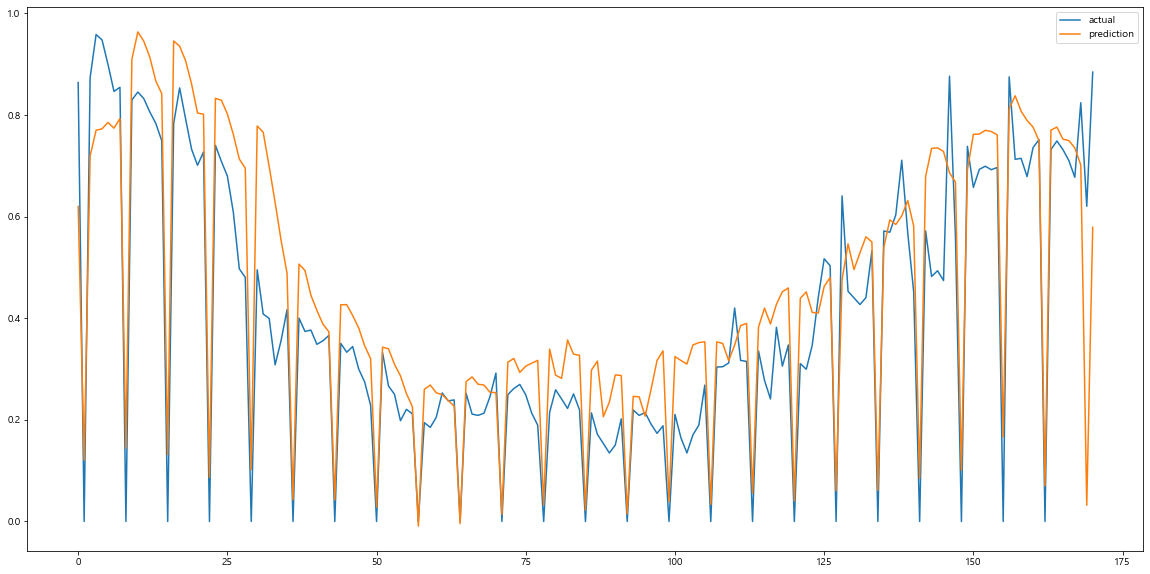

깻잎_가격(원/kg)_tg 예측 모델 
(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 28, 32)            6912      
_________________________________________________________________
lstm_16 (LSTM)               (None, 28, 32)            8320      
_________________________________________________________________
lstm_17 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 23,585
Trainable params: 23,585
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0003
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x0000021A3132BBE0>]
loss_function:

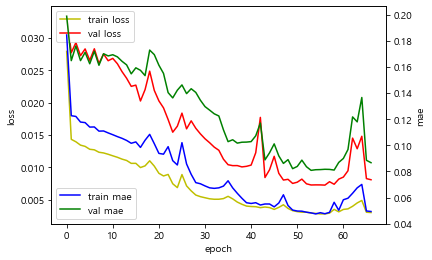

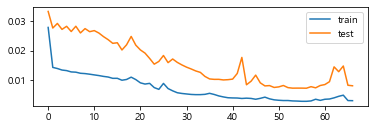

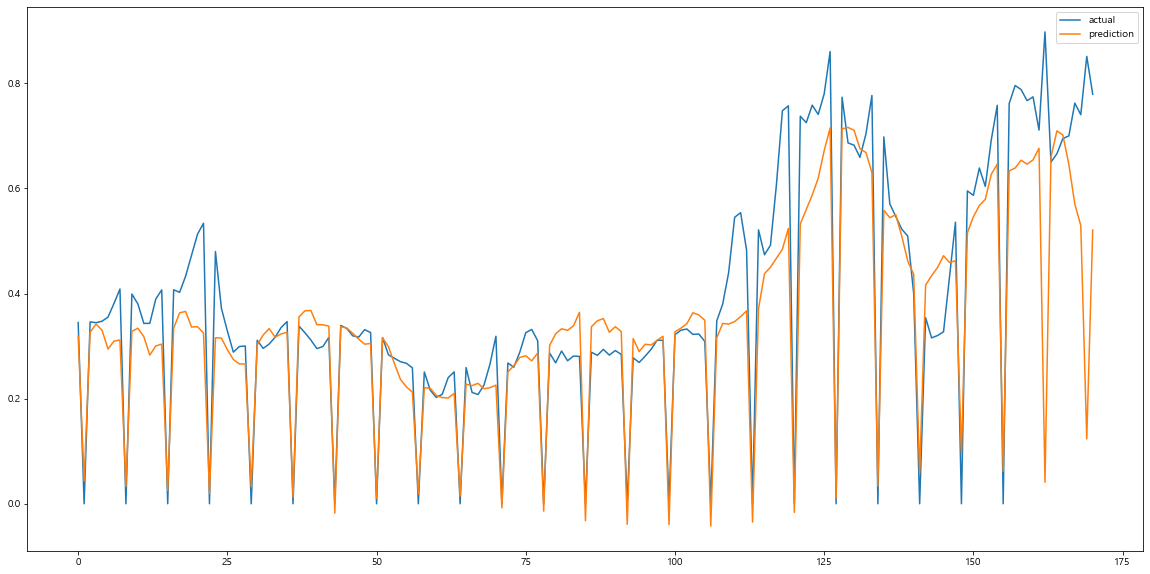

시금치_가격(원/kg)_tg 예측 모델 
(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 28, 32)            6912      
_________________________________________________________________
lstm_18 (LSTM)               (None, 28, 32)            8320      
_________________________________________________________________
lstm_19 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 23,585
Trainable params: 23,585
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0003
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x0000021A3D2E89D0>]
loss_function

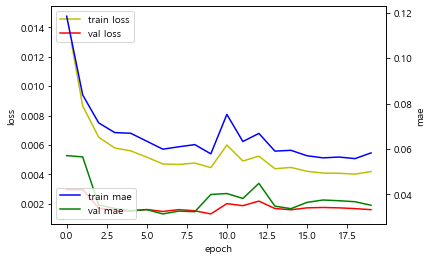

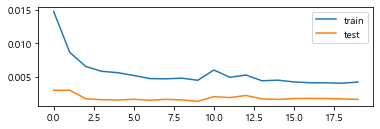

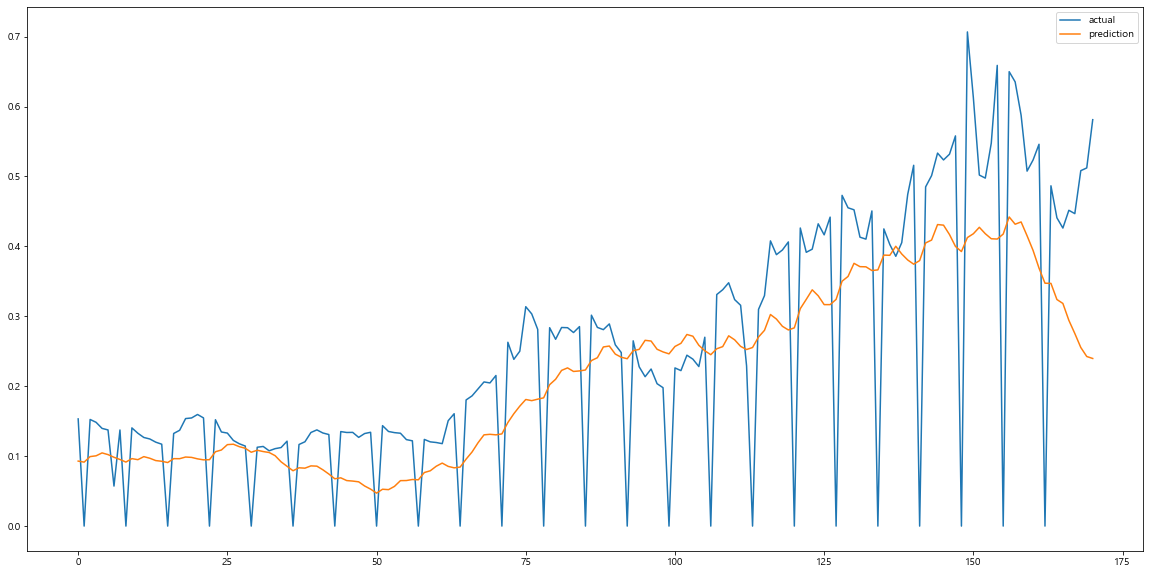

미나리_가격(원/kg)_tg 예측 모델 
(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 28, 32)            6912      
_________________________________________________________________
lstm_20 (LSTM)               (None, 28, 32)            8320      
_________________________________________________________________
lstm_21 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 23,585
Trainable params: 23,585
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0003
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x0000021A38979FD0>]
loss_functio

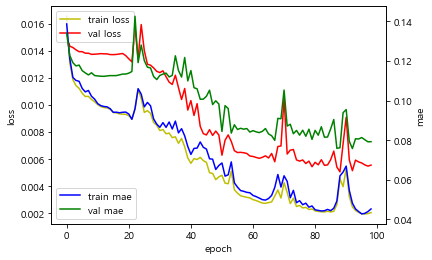

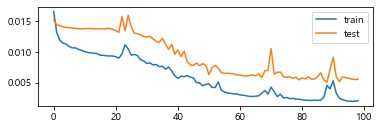

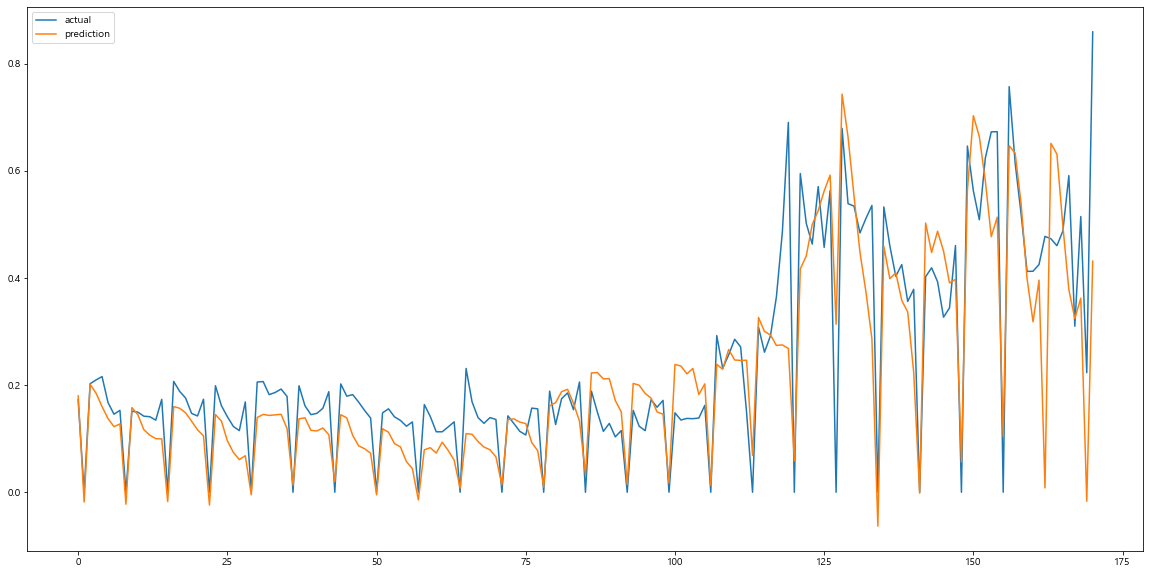

당근_가격(원/kg)_tg 예측 모델 
(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_11 (Conv1D)           (None, 28, 32)            6912      
_________________________________________________________________
lstm_22 (LSTM)               (None, 28, 32)            8320      
_________________________________________________________________
lstm_23 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 23,585
Trainable params: 23,585
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0003
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x0000021A3AC5C640>]
loss_function

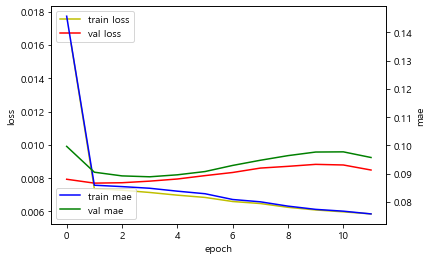

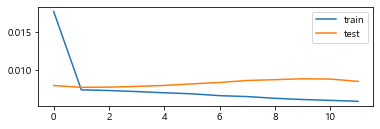

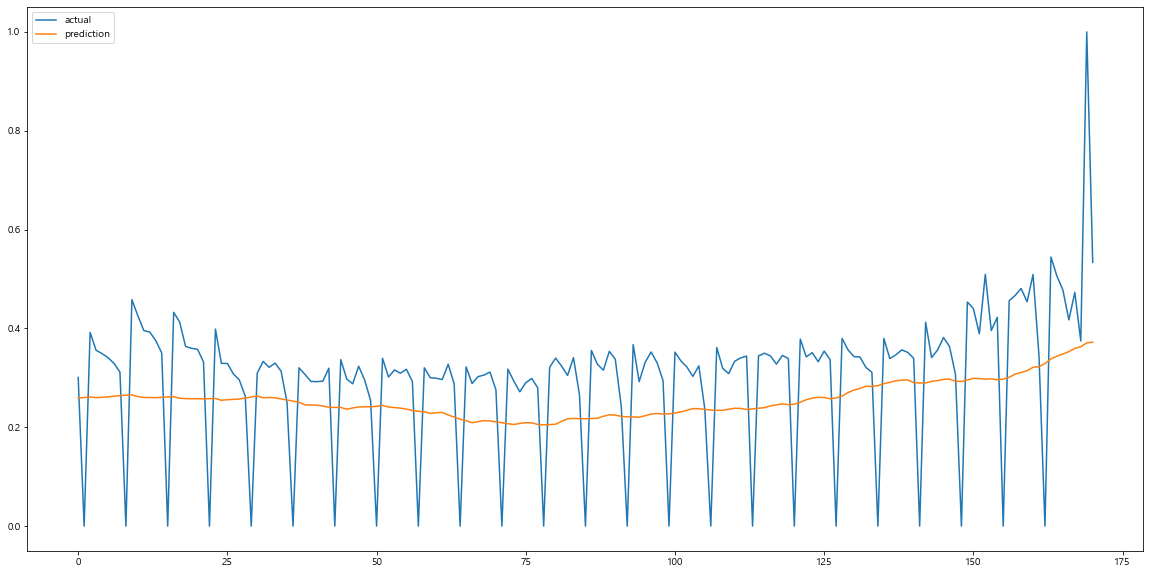

파프리카_가격(원/kg)_tg 예측 모델 
(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 28, 32)            6912      
_________________________________________________________________
lstm_24 (LSTM)               (None, 28, 32)            8320      
_________________________________________________________________
lstm_25 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 23,585
Trainable params: 23,585
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0003
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x0000021A36149970>]
loss_functi

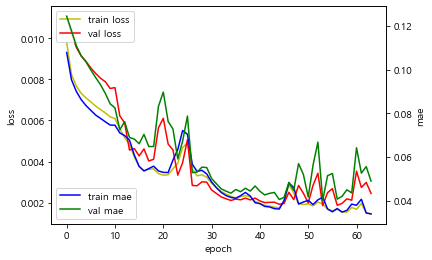

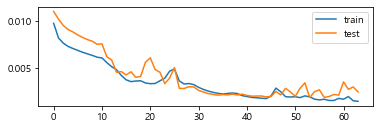

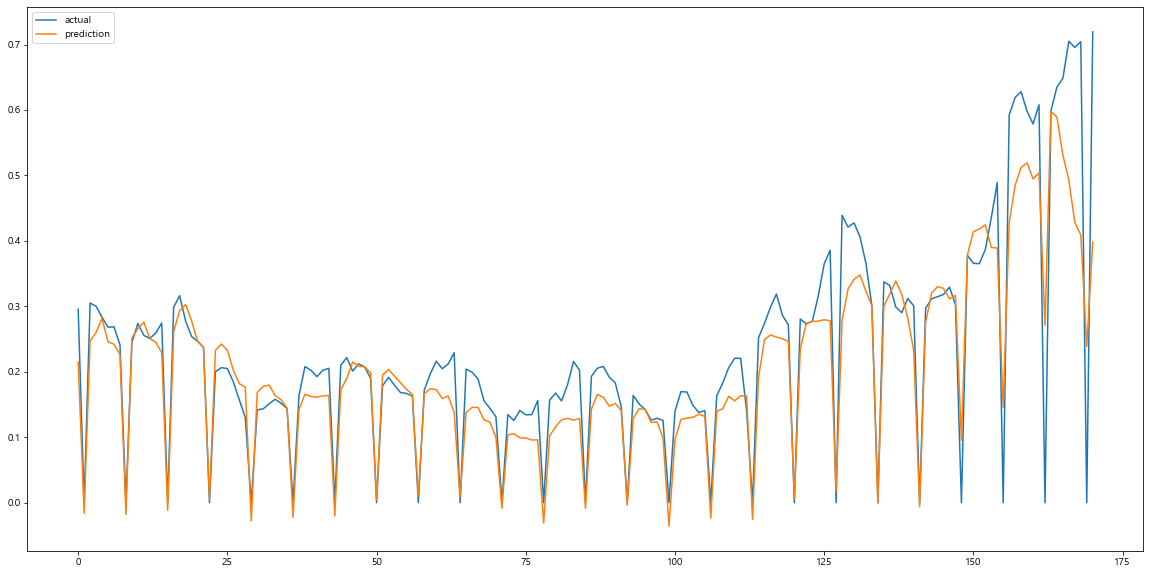

새송이_가격(원/kg)_tg 예측 모델 
(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_13 (Conv1D)           (None, 28, 32)            6912      
_________________________________________________________________
lstm_26 (LSTM)               (None, 28, 32)            8320      
_________________________________________________________________
lstm_27 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 33        
Total params: 23,585
Trainable params: 23,585
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0003
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x0000021A314411F0>]
loss_functio

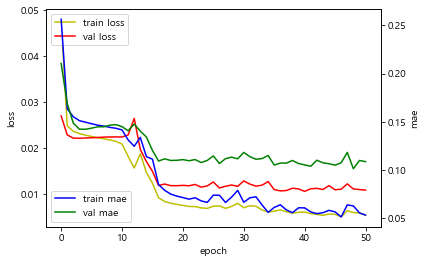

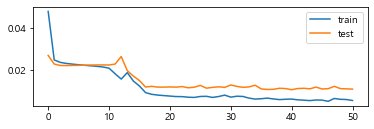

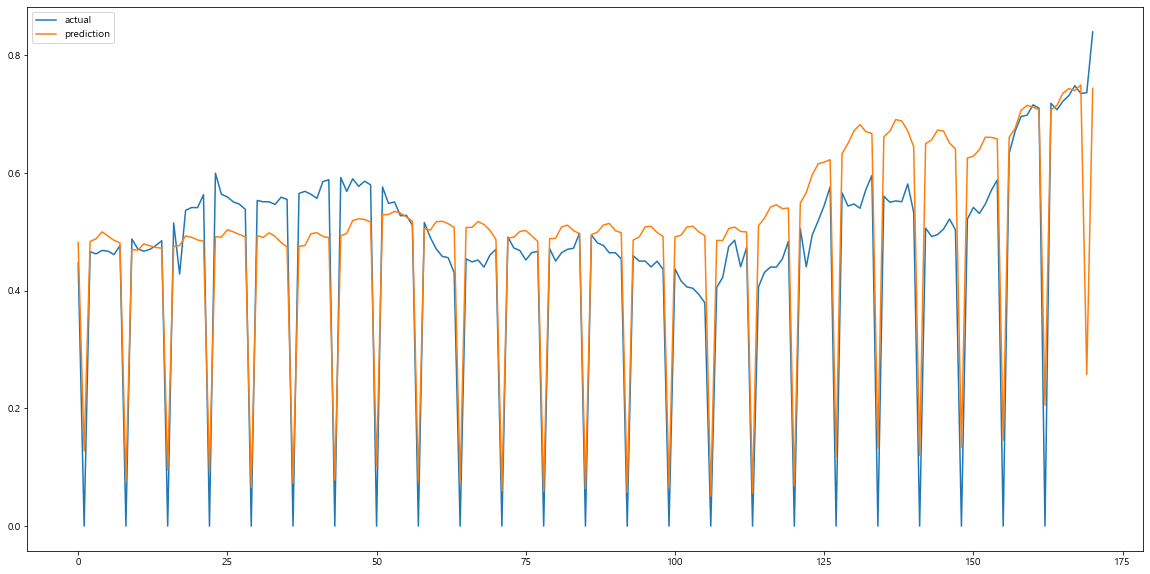

팽이버섯_가격(원/kg)_tg 예측 모델 
(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_14 (Conv1D)           (None, 28, 32)            6912      
_________________________________________________________________
lstm_28 (LSTM)               (None, 28, 32)            8320      
_________________________________________________________________
lstm_29 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 33        
Total params: 23,585
Trainable params: 23,585
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0003
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x0000021A3AF44BE0>]
loss_functi

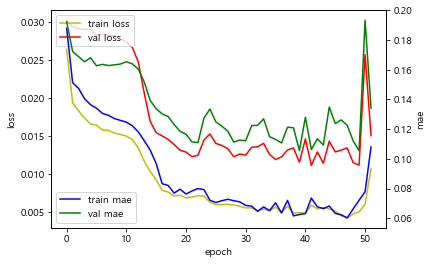

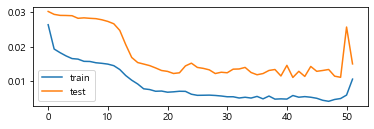

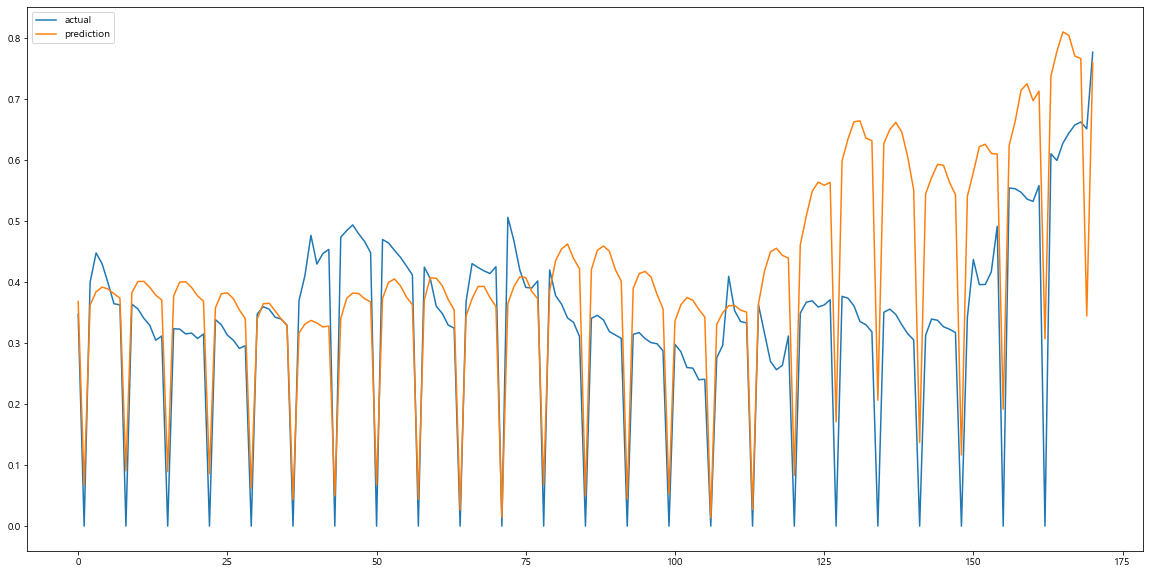

토마토_가격(원/kg)_tg 예측 모델 
(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 28, 32)            6912      
_________________________________________________________________
lstm_30 (LSTM)               (None, 28, 32)            8320      
_________________________________________________________________
lstm_31 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 33        
Total params: 23,585
Trainable params: 23,585
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0003
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x0000021A322FB970>]
loss_functio

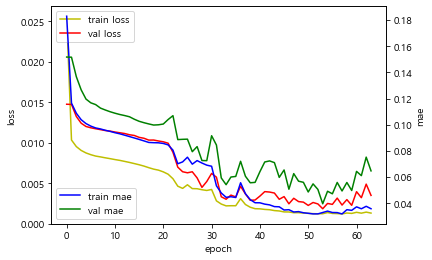

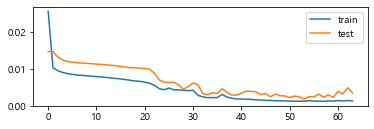

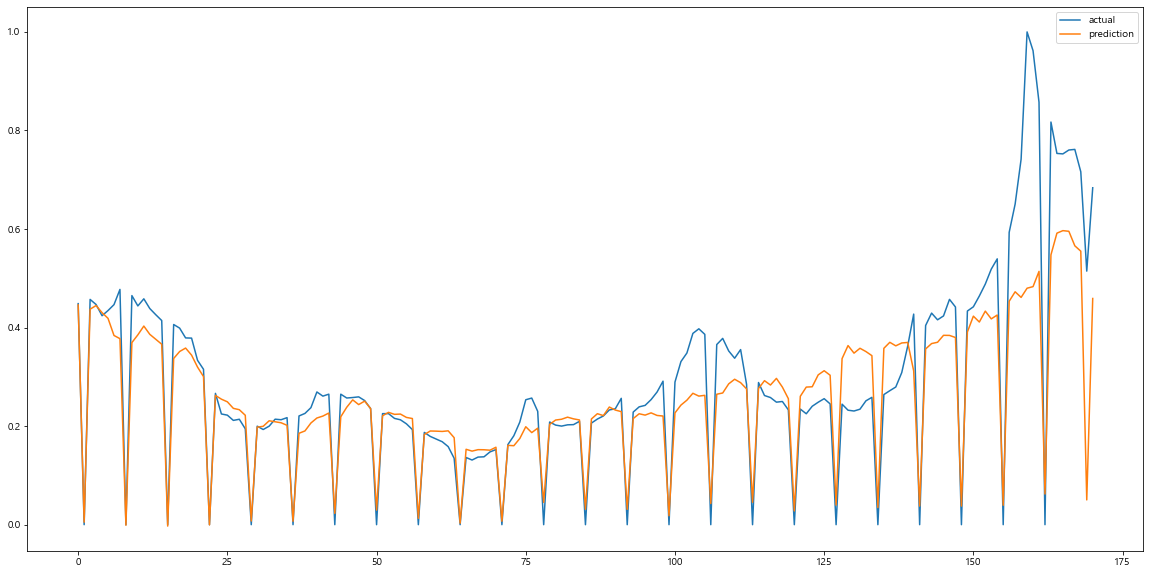

청상추_가격(원/kg)_tg 예측 모델 
(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 28, 32)            6912      
_________________________________________________________________
lstm_32 (LSTM)               (None, 28, 32)            8320      
_________________________________________________________________
lstm_33 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 33        
Total params: 23,585
Trainable params: 23,585
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0003
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x0000021A3AF96FA0>]
loss_functio

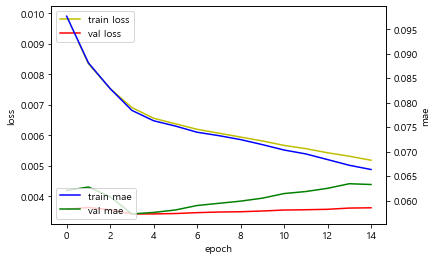

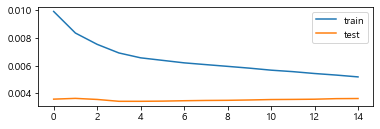

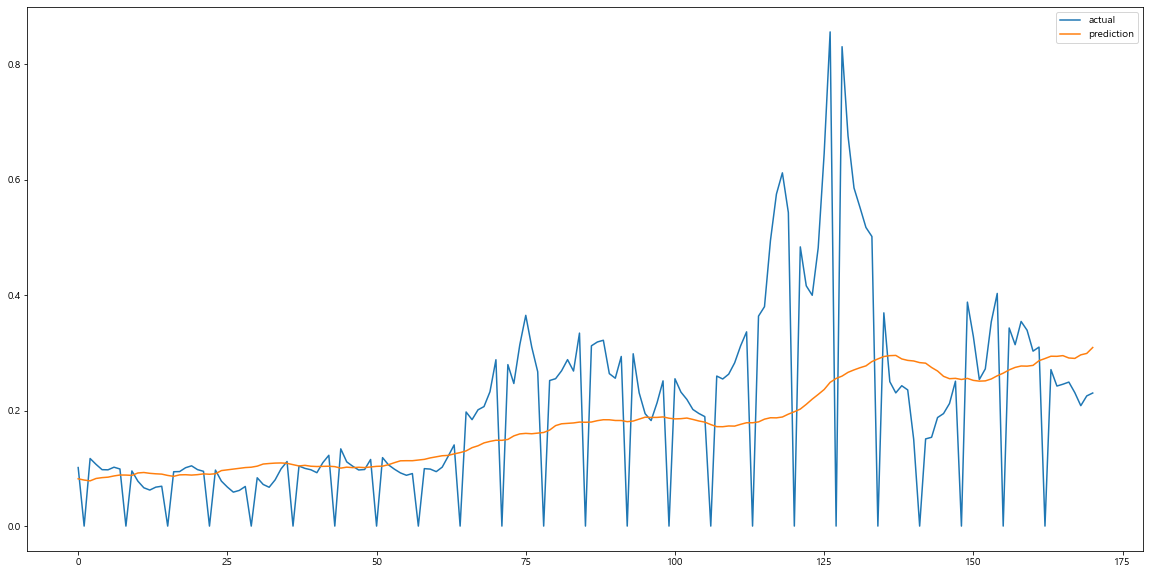

백다다기_가격(원/kg)_tg 예측 모델 
(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_17 (Conv1D)           (None, 28, 32)            6912      
_________________________________________________________________
lstm_34 (LSTM)               (None, 28, 32)            8320      
_________________________________________________________________
lstm_35 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 33        
Total params: 23,585
Trainable params: 23,585
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0003
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x0000021A322F2BE0>]
loss_functi

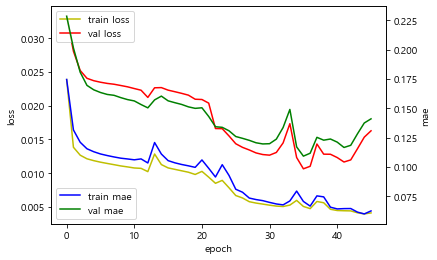

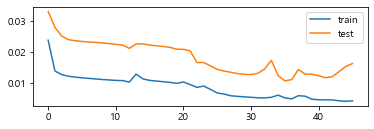

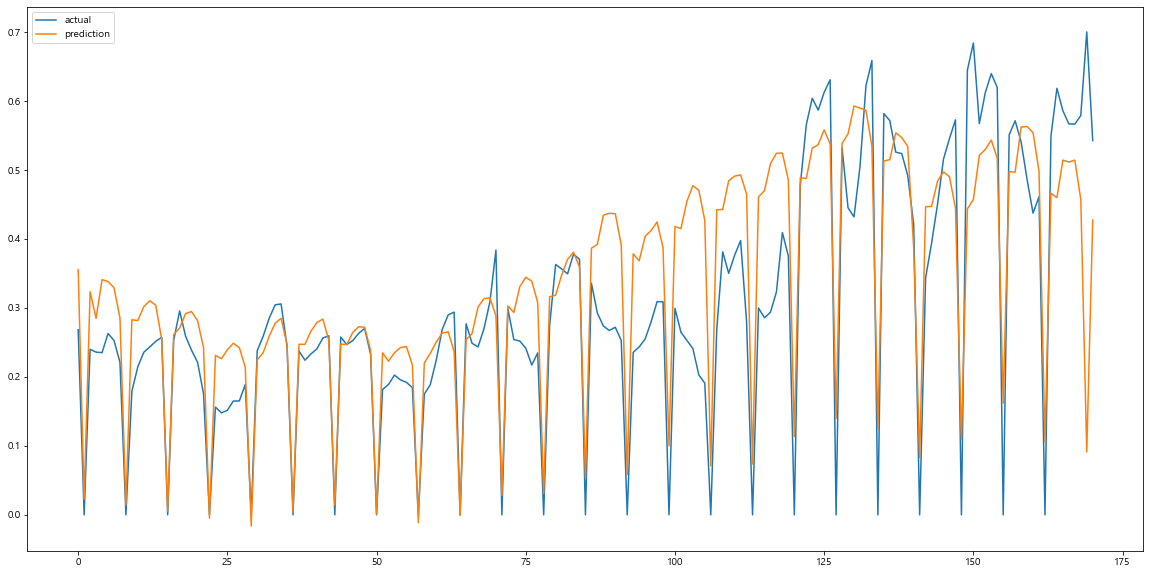

애호박_가격(원/kg)_tg 예측 모델 
(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_18 (Conv1D)           (None, 28, 32)            6912      
_________________________________________________________________
lstm_36 (LSTM)               (None, 28, 32)            8320      
_________________________________________________________________
lstm_37 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 33        
Total params: 23,585
Trainable params: 23,585
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0003
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x0000021A3FED8850>]
loss_functio

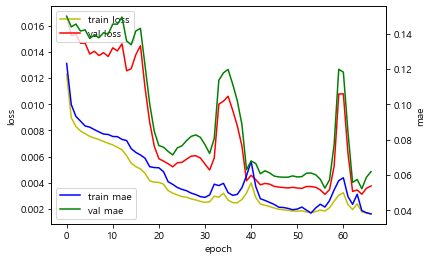

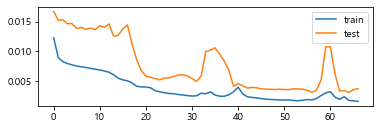

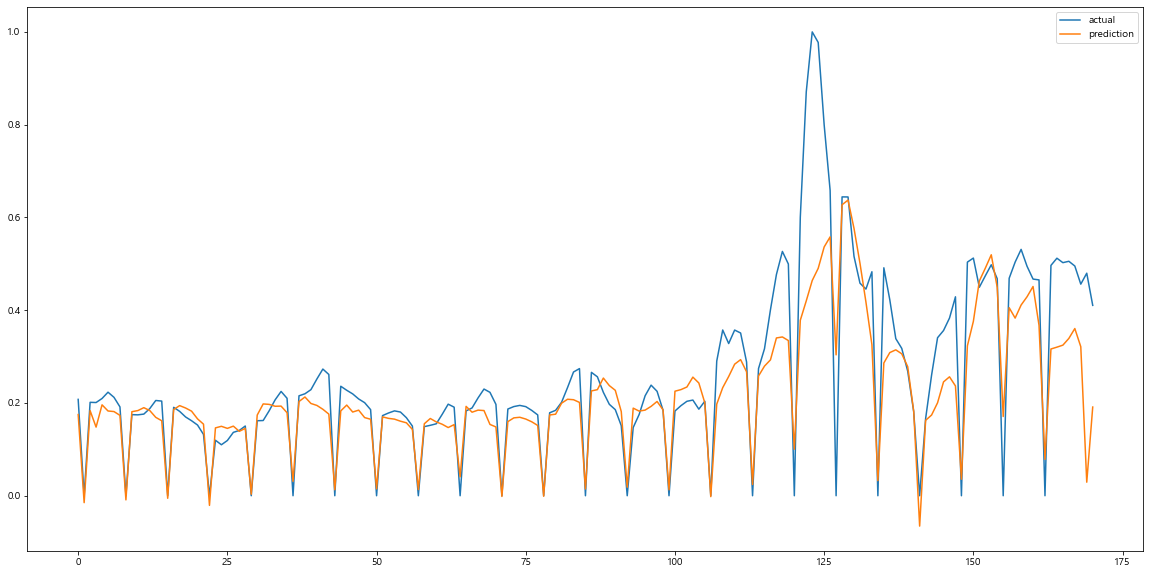

캠벨얼리_가격(원/kg)_tg 예측 모델 
(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_19 (Conv1D)           (None, 28, 32)            6912      
_________________________________________________________________
lstm_38 (LSTM)               (None, 28, 32)            8320      
_________________________________________________________________
lstm_39 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 33        
Total params: 23,585
Trainable params: 23,585
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0003
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x0000021A32608B20>]
loss_functi

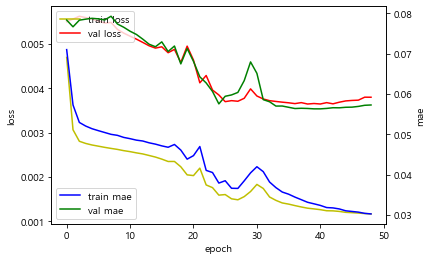

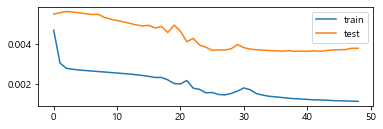

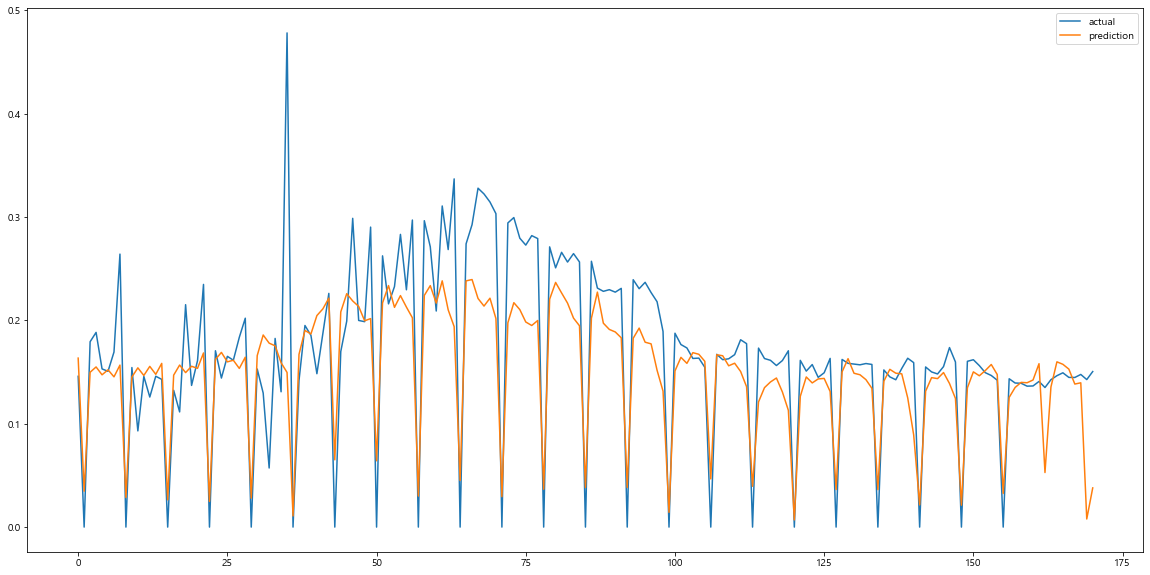

샤인마스캇_가격(원/kg)_tg 예측 모델 
(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 28, 32)            6912      
_________________________________________________________________
lstm_40 (LSTM)               (None, 28, 32)            8320      
_________________________________________________________________
lstm_41 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 33        
Total params: 23,585
Trainable params: 23,585
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0003
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x0000021A3B13F3A0>]
loss_funct

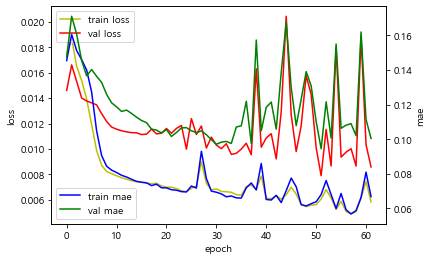

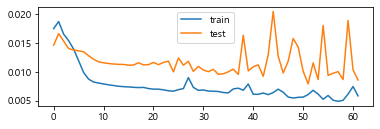

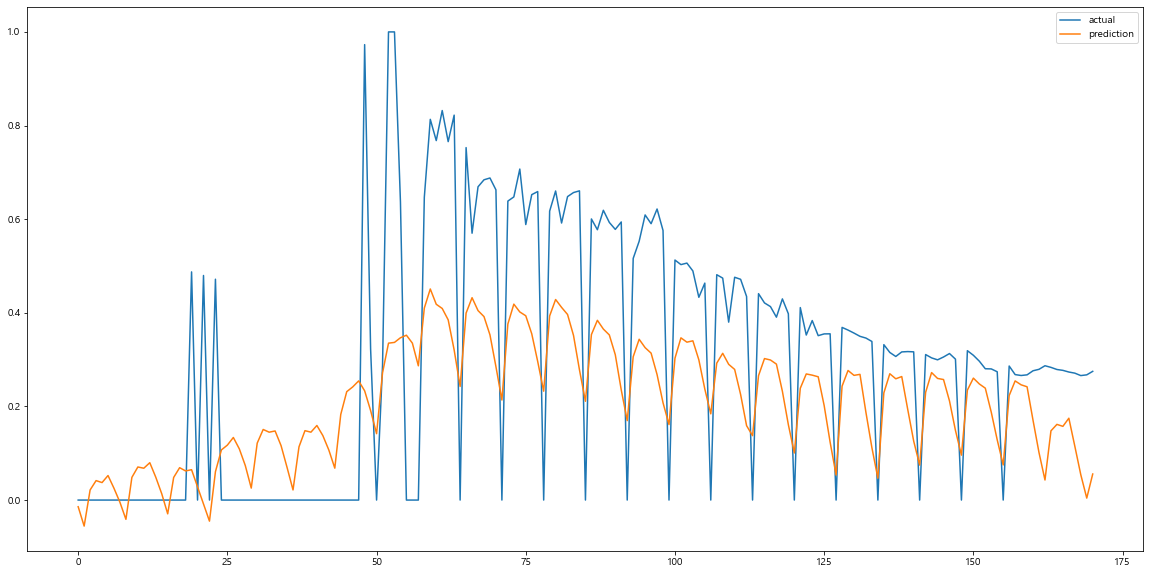

In [62]:
for col in label_col_list:
    print("="*100)
    print("{0} 예측 모델 ".format(col))
    print("="*100)
    # 입력값과 출력값으로 분리
    # train_X, train_y = train_df.iloc[:, :features_len * WINDOW_SIZE], train_df.loc[:,label_col_list[0]]
    # val_X, val_y = val_df.iloc[:, :features_len * WINDOW_SIZE], val_df.loc[:,label_col_list[0]]
    # test_X, test_y = test_df.iloc[:, :features_len * WINDOW_SIZE], test_df.loc[:,label_col_list[0]]
    train_X, train_y = train_df.iloc[:, :features_len * WINDOW_SIZE], train_df.loc[:,col]
    val_X, val_y = val_df.iloc[:, :features_len * WINDOW_SIZE], val_df.loc[:,col]
    test_X, test_y = test_df.iloc[:, :features_len * WINDOW_SIZE], test_df.loc[:,col]
    #=============================================================================================== label_col_list 변경해야함.
    # 범위, 타임스탬프, 컬럼
    train_X = train_X.values.reshape((train_X.shape[0], WINDOW_SIZE, features_len))
    val_X = val_X.values.reshape((val_X.shape[0], WINDOW_SIZE, features_len))
    test_X = test_X.values.reshape((test_X.shape[0], WINDOW_SIZE, features_len))

    train_y = train_y.values.reshape((train_y.shape[0], 1))
    val_y = val_y.values.reshape((val_y.shape[0], 1))
    test_y = test_y.values.reshape((test_y.shape[0], 1))
    # print(so_train_X.shape, train_y.shape, test_X.shape, test_y.shape)

    print(train_X.shape, train_y.shape)
    print(val_X.shape, val_y.shape)
    print(test_X.shape, test_y.shape)

    # 모델 구성 CNN + LSTM
    conv_lstm2_model = keras.Sequential([
        keras.layers.Conv1D(filters=filter_size, kernel_size=(CONV_WIDTH[1], ),
                            strides=1, padding="causal", 
                            activation="relu", 
                            input_shape=[WINDOW_SIZE, features_n]), 
        keras.layers.LSTM(32, activation="relu", return_sequences=True),
        keras.layers.LSTM(32, activation="relu", return_sequences=False),
        # keras.layers.Dense(16, activation="relu"),
        keras.layers.Dense(1),
        # keras.layers.Lambda(lambda x: x * 200)
    ])
    conv_lstm2_model.summary()
    hist = model_complie_fit(conv_lstm2_model, train_X, train_y, val_X, val_y)
    # 저장한 데이터를 로드
    conv_lstm2_model.load_weights("best_model.h5")
    # conv_lstm_model = keras.models.load_weights("best_model.h5")
    pred = conv_lstm2_model.predict(test_X)
    val_performance_dict, performance_dict = model_perfomance_print(conv_lstm2_model, "CNN_LSTM2", val_X, val_y, test_X, test_y, False)
    score = r2_score(test_y, pred)
    # test_y.shape
    print("r2 score :", r2_score(test_y, pred))

    perfomance_plot_show(hist)
    # prediction_plot_show(test_y, pred)
    # prediction_plot_show(test_y, pred)
    # test_y_df = pd.DataFrame(test_y.reshape(test_y.shape[0]*test_y.shape[1], test_y.shape[2]))
    # pred_df=pd.DataFrame(arg_pred)

    # 예측 데이터 시각화 
    plt.figure(figsize=(20, 10))
    plt.plot(test_y, label='actual')
    plt.plot(pred, label='prediction')
    plt.legend()
    plt.show()

In [63]:
# CNN + LSTM, LSTM 

# 특성공학 CNN + LSTM, LSTM

# 튜닝 

# seq2seq, light GBM

# 특성공학 
# 7, 14, 28

In [64]:
# val_performance = {}
# performance = {}
# val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
# performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

In [69]:
conv_lstm_model.metrics_names.index('mae')

1

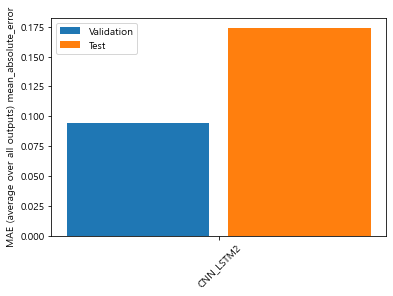

In [70]:
x = np.arange(len(performance_dict))
width = 0.3
# metric_name = 'mean_absolute_error'
metric_name = 'mean_absolute_error'
# metric_index = conv_lstm_model.metrics_names.index('mean_absolute_error')
metric_index = conv_lstm_model.metrics_names.index('mae')
val_mae = [v[metric_index] for v in val_performance_dict.values()]
test_mae = [v[metric_index] for v in performance_dict.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance_dict.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs) mean_absolute_error')
_ = plt.legend()

In [71]:
for name, value in performance_dict.items():
  print(f'{name:12s}: {value[1]:0.4f}')

CNN_LSTM2   : 0.1736


In [68]:
# 다중 input -> output 1 일때 